In [1]:
import pandas as pd
import numpy as np

import math
import missingno as msno
from datetime import datetime, timedelta


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_kiva_loans = pd.read_csv('./data/kiva_loans.csv', nrows=None, index_col=0, parse_dates=['date', 'posted_time', 'disbursed_time', 'funded_time'])


# Обзор DataFrame

In [3]:
df_kiva_loans.sample(10)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
id,,,,,,,,,,,,,,,,,,,
1298859,150.0,150.0,Fruits & Vegetables,Food,"to buy tomatoes, onions, potatoes, cabbages, b...",KE,Kenya,Tala;Kangundo,KES,133.0,2017-05-15 21:00:32+00:00,2017-04-15 07:00:00+00:00,2017-05-23 20:22:13+00:00,14.0,6,"#Parent, #Woman Owned Biz, #Schooling",female,monthly,2017-05-15
982029,125.0,125.0,Sewing,Services,to buy fabrics and elastic.,MG,Madagascar,Antananarivo,MGA,443.0,2015-11-20 09:29:24+00:00,2015-10-27 07:00:00+00:00,2015-11-26 20:31:14+00:00,8.0,5,NaN,female,irregular,2015-11-20
824367,475.0,475.0,Clothing Sales,Clothing,to purchase clothes and resell them in order t...,YE,Yemen,Aden,YER,205.0,2015-01-06 09:01:34+00:00,2014-12-18 08:00:00+00:00,2015-01-07 08:02:53+00:00,40.0,10,NaN,female,irregular,2015-01-06
836078,1075.0,1075.0,Agriculture,Agriculture,to purchase a solar light and gain access to c...,KE,Kenya,kakamega south,KES,202.0,2015-02-04 12:57:26+00:00,2015-02-01 08:00:00+00:00,2015-02-28 21:17:23+00:00,11.0,40,user_favorite,"female, female, female, female, female, female...",bullet,2015-02-04
679794,950.0,950.0,Construction Supplies,Construction,"to purchase cement, zinc, nails and a locker d...",SL,Sierra Leone,Masuba town,SLL,183.0,2014-03-05 15:53:08+00:00,2014-02-06 08:00:00+00:00,2014-03-12 16:04:35+00:00,14.0,25,NaN,male,monthly,2014-03-05
854716,200.0,200.0,Recycled Materials,Retail,To aaeincrease her husband's scrap recycling b...,PK,Pakistan,Rawalpindi,PKR,247.0,2015-03-13 03:39:00+00:00,2015-03-05 08:00:00+00:00,2015-03-19 08:58:17+00:00,12.0,2,NaN,female,irregular,2015-03-13
1206821,675.0,675.0,Farming,Agriculture,to buy cost efficient maize seeds and fertiliz...,KE,Kenya,Webuye,KES,202.0,2016-12-20 08:12:18+00:00,2017-02-01 08:00:00+00:00,2016-12-31 15:32:23+00:00,11.0,16,"#Sustainable Ag, #Eco-friendly, #Parent, #Tech...","female, male, male, female, male, female, fema...",bullet,2016-12-20
985708,275.0,275.0,Tailoring,Services,to buy new supplies for her sewing machine.,PH,Philippines,"Binalbagan, Negros Occidental",PHP,145.0,2015-11-26 06:15:45+00:00,2015-11-11 08:00:00+00:00,2015-12-03 00:58:56+00:00,11.0,2,volunteer_pick,female,irregular,2015-11-26
1059276,350.0,350.0,Cattle,Agriculture,to buy more cattle to raise and food for them.,CO,Colombia,San Antonio de Palmito,COP,177.0,2016-04-22 19:11:29+00:00,2016-03-23 07:00:00+00:00,2016-05-22 18:43:21+00:00,17.0,10,"#Animals, #Supporting Family",male,bullet,2016-04-22


In [4]:
df_mpi = pd.read_csv('./data/kiva_mpi_region_locations.csv')
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


для начала посмотрим сколько пропущенныз значений содержится в нашем DF

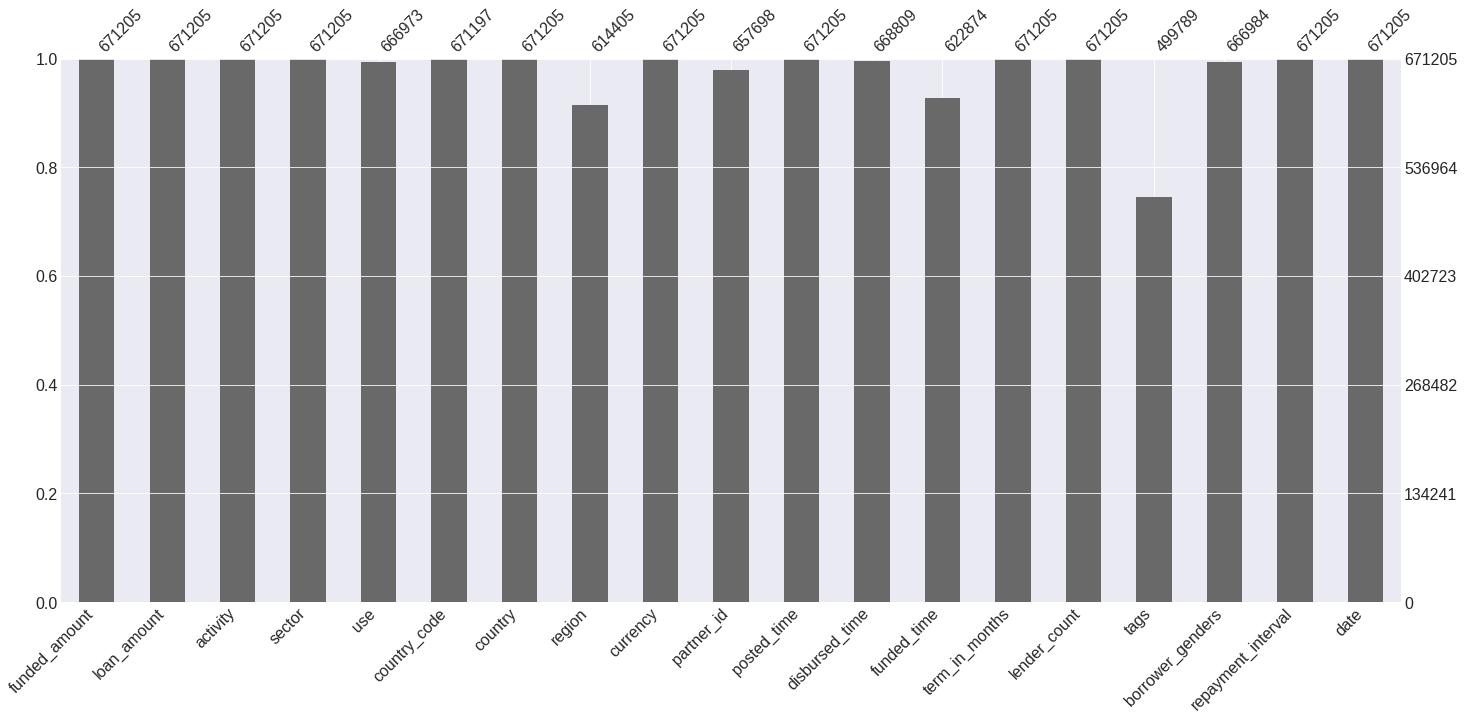

In [5]:
msno.bar(df_kiva_loans)

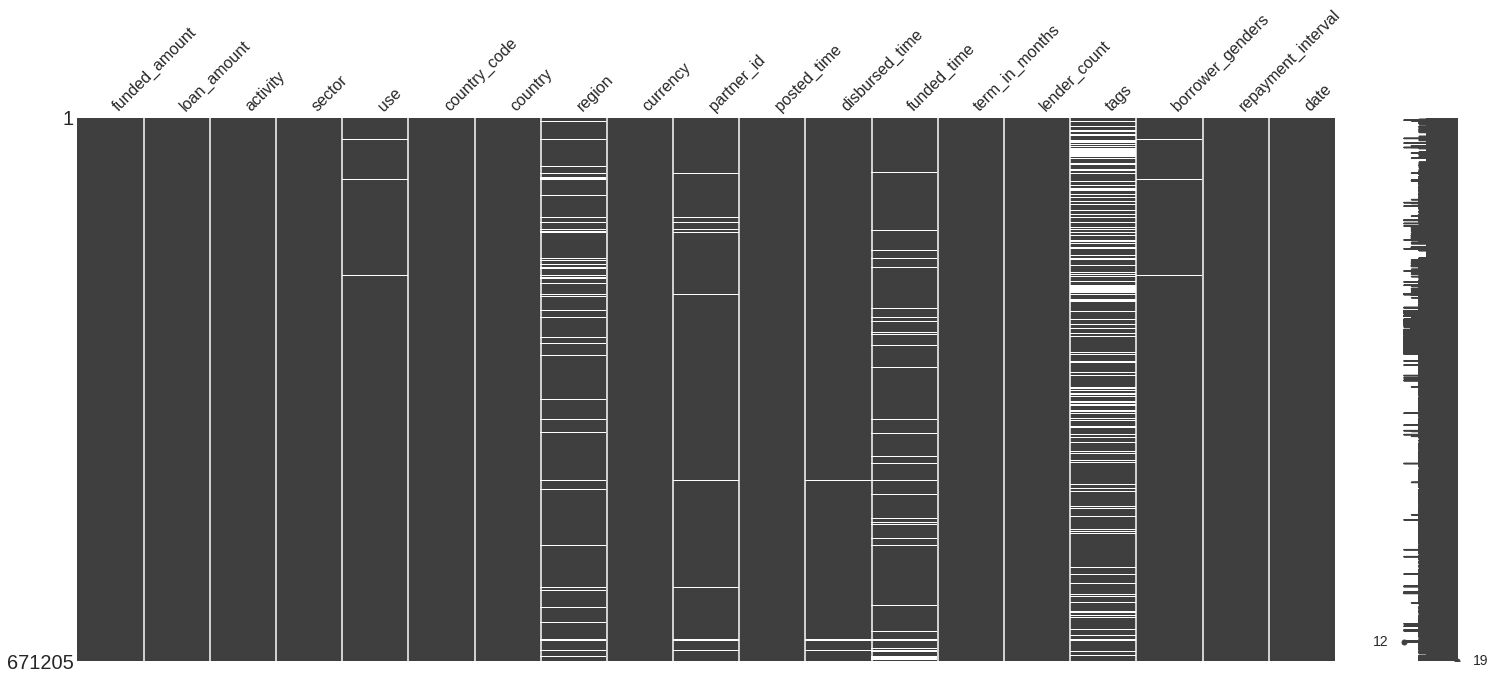

In [6]:
msno.matrix(df_kiva_loans)

- Столбец тегов содержит много пропущенных значений.
- Также столбец с датой, когда запрашиваемая сумма была собрана на платформе kiva, имеет около 8% пропусков. Это может означать, либо то, что сумма пока несобрана, либо то, что она не была отражена в выгрузке корректно

Далее изучим каждый атрибут по отдельности и выведем ряд статистик для каждого

In [7]:
df_kiva_loans.shape
df_kiva_loans.dtypes

funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
partner_id                        float64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                        int64
tags                               object
borrower_genders                   object
repayment_interval                 object
date                       datetime64[ns]
dtype: object

Статистика по всем численным атибутам 

In [8]:
df_kiva_loans.describe(include='number')

,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,785.995061,842.397107,178.199616,13.739022,20.590922
std,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,0.000000,25.000000,9.000000,1.000000,0.000000
25%,250.000000,275.000000,126.000000,8.000000,7.000000
50%,450.000000,500.000000,145.000000,13.000000,13.000000
75%,900.000000,1000.000000,204.000000,14.000000,24.000000
max,100000.000000,100000.000000,536.000000,158.000000,2986.000000


Статистика по всем строковым атрибутам

In [9]:
df_kiva_loans.describe(include='object')

,activity,sector,use,country_code,country,region,currency,tags,borrower_genders,repayment_interval
count,671205,671205,666973,671197,671205,614405,671205,499789,666984,671205
unique,163,15,424912,86,87,12695,67,86719,11298,4
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,user_favorite,female,monthly
freq,72955,180302,5217,160441,160441,10000,160440,27088,426502,342717


Статистика по всем временным атрибутам 

In [10]:
df_kiva_loans.describe(include=['datetimetz', 'datetime'])

,posted_time,disbursed_time,funded_time,date
count,671205,668809,622874,671205
unique,667399,5719,498007,1298
top,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,2017-03-20 00:00:00
freq,25,2800,33,1308
first,2014-01-01 04:49:26+00:00,2013-12-02 08:00:00+00:00,2014-01-01 12:18:55+00:00,2014-01-01 00:00:00
last,2017-07-26 06:31:46+00:00,2017-09-30 07:00:00+00:00,2017-07-26 02:09:43+00:00,2017-07-26 00:00:00


## первые  очевидные результаты и выводы, которые можно сделать:
- в этом датасете содержаться данные о **87** странах почти на всех континентах
- Страна с самым большим количеством займов является **Филиппины**
- Наиболее популярной категорией займов является **Сельское хозяйство**
- Довольно большой разброс по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредида
- В данном датасете **11298** различных значений пола! Очевидно, что это невозможно! Надо попытаться найти объяснение. 
- Среднее финансирование в мире составляет **786** долларов, а медианное значение **450** долларов. Возможно это означает, что есть небольшая доля заявок с очень большими суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие заявки, а так же понять, насколько быстро деньги попали к заявителям от момента подачи заявки и сбора всей суммы.
- Что еще более важно, есть только **1298** различных дат в которых были опубликованны заявки на кредиты. Если посчитать соотношение, то это означает, что ежедневно выдается более **500** займов

# Пользователи Kiva

В этой части сосредоточимся на основных демографических свойств людей, которые можно получить из выгрузки: где живут, какой пол, для каких нужд запрашивают финансирование

## Из каких стран люди

что бы получить наиболее значимые (статистически) результаты, оставим только те страны, которые составляют не менее 0,05%

In [11]:
# df_kiva_loans['country'].isin()  
(df_kiva_loans['country'].value_counts() > len(df_kiva_loans)*0.005).where(lambda x: x == True).dropna().index

Index(['Philippines', 'Kenya', 'El Salvador', 'Cambodia', 'Pakistan', 'Peru',
       'Colombia', 'Uganda', 'Tajikistan', 'Ecuador', 'Paraguay', 'Nicaragua',
       'India', 'Vietnam', 'Nigeria', 'Bolivia', 'Lebanon', 'Armenia',
       'Palestine', 'Samoa', 'Guatemala', 'Rwanda', 'Mali', 'Honduras',
       'Indonesia', 'United States', 'Kyrgyzstan', 'Togo', 'Mexico',
       'Sierra Leone', 'Tanzania', 'Ghana', 'Jordan', 'Zimbabwe', 'Madagascar',
       'Liberia', 'Haiti', 'Mozambique'],
      dtype='object')

In [12]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True) > 0.005]
list_countries = list(countries.index)

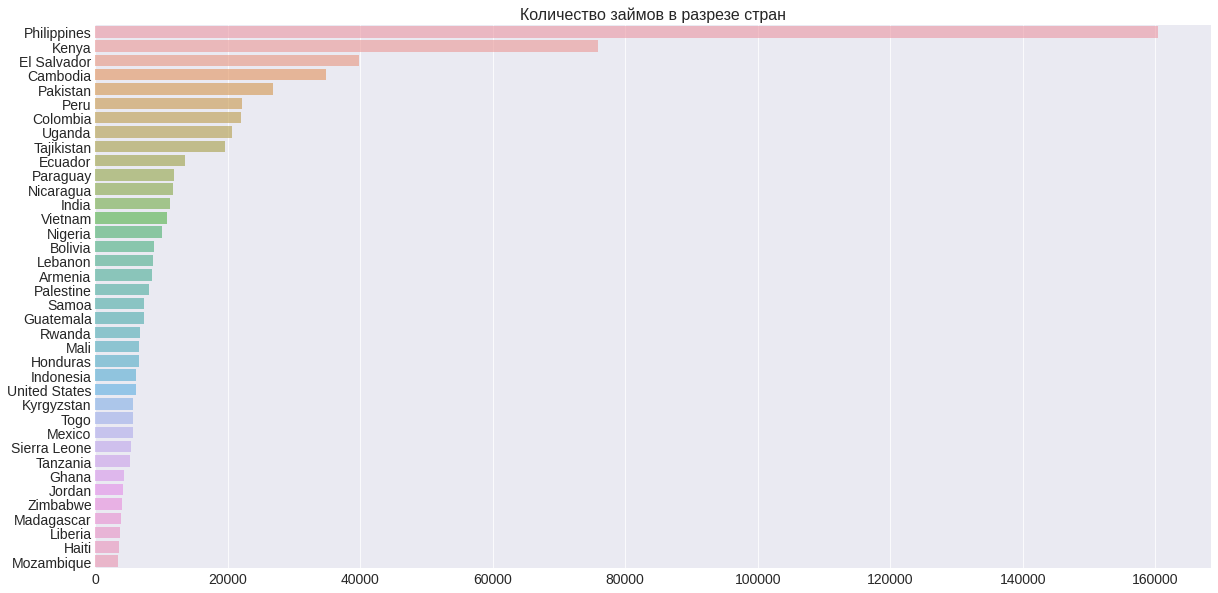

In [13]:
plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе стран', fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=.6)
plt.show()

постараемся сгрупировать страны по частям света

In [14]:
df_mpi.shape
df_mpi.sample(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
1604,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1048,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
304,"Kanifing, Gambia",GMB,Gambia,Kanifing,Sub-Saharan Africa,0.157,"(14.6489525, 2.1450245)",14.648953,2.145024
963,"South East, Viet Nam",VNM,Viet Nam,South East,East Asia and the Pacific,0.017,"(14.058324, 108.277199)",14.058324,108.277199
2481,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN


In [15]:
# сгрупируем по регионам и странам >> 
# возьмем средний показатель индекса бедности >> 
# заполним пустые значения 0 >> 
# сбросим мультииндекс получившийся от группировки

df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()
df_mpi_grouped

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


In [16]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')


In [17]:
# возьмем серию из стран (данные по заемам) >>
# переименуем индекс в серии >>
# сбросим индекс и превратим в DataFrame >>
# объединим полученные данные с набором данных по мировым регионам.
# изменим порядок полей

# regions = countries\
#     .rename_axis('country')\
#     .reset_index(name='number_of_loans')\
#     .merge(df_mpi_grouped, how='left', on='country')
# regions = regions[['country', 'ISO', 'world_region', 'number_of_loans', 'MPI']]

regions = df_kiva_loans['world_region'].value_counts()
regions_list = regions.index.to_list()

список стран, по которым не произошло совпадения из набора данных df_mpi

In [18]:
regions

East Asia and the Pacific      206949
Sub-Saharan Africa             162903
Latin America and Caribbean    133759
Europe and Central Asia         38827
South Asia                      38815
Arab States                      9187
Name: world_region, dtype: int64

In [19]:
# сгрупируем данные по континентам и посчитаем сумму займов
# отсортируем данные по значениям в обратном порядке
# world_region_sum = regions.groupby('world_region')['number_of_loans'].sum().sort_values(ascending=False)
# world_region_sum

In [20]:
# альтернативный вариант расчетов

# # df_mpi[df_mpi[['country','ISO', 'world_region']].duplicated() == False][['country','ISO', 'world_region']]
# world_regions = countries.to_frame(name='loan_qnt')\
#     .merge(
#         df_mpi[df_mpi[['country','ISO', 'world_region']].duplicated() == False][['country','ISO', 'world_region']], 
#         how='left', left_index=True, right_on='country'
#     )
# world_region_sum =  world_region.groupby(['world_region'], ).sum()


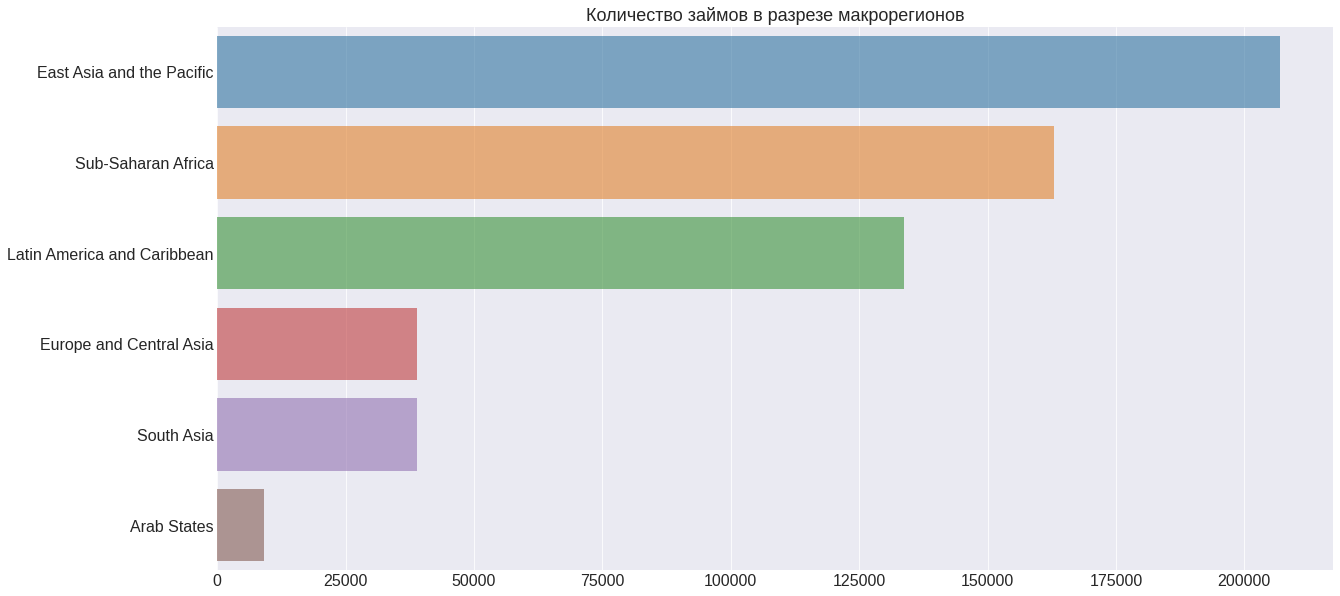

In [21]:
plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе макрорегионов', fontsize=18)
plt.tick_params(labelsize=16)
sns.barplot(y=regions.index, x=regions.values, alpha=.6)
plt.show()

- Очевидно наличие 3-х лидеров и 3-х аутсайдеров по количеству выданных займов. 
- У аутсайдеров либо нет потребности в получении заёмов, либо Kiva еще не набрала оборотов по сравнению с лидерами. Присутствие "Арабских стран" в аутсайдерах скорее говорит в пользу первого предположения. 

## Анализ гендерного признака у заемщиков

In [22]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                                                                                                      426502
male                                                                                                                                                                                                                                                                                                                                        134710
female, female                                                                                                                                                                                                                                                                                                                    

- в атрибуте пола заемщика так же указываются группы созаемщиков, где гендерный признак каждого участника перечислен через запятую.
- определим группы созаемщиков, разбив всех на мужчин, женщин и группы, состоящие только из мужчин (male+), 

In [23]:
import functools

@functools.lru_cache(None)
def gender_group(x: str): 
    if not isinstance(x, str):
        return 'other'
    x = x.strip().lower()
    gen_set = set(x.split(', '))
    if x == 'male' or x == 'female':
        return x
    elif len(gen_set) == 1 and any(['male' in gen_set, 'female' in gen_set]):
        return 'male=' if 'male' in gen_set else 'female='
    elif all([len(gen_set) == 2, 'male' in gen_set, 'female' in gen_set]):
        ser = pd.Series(x.split(', ')).value_counts()
        m, f = ser['male'], ser['female']
        return 'm = f' if m==f else 'male>' if m>f else 'female>'
    else:
        return 'other'
        
    
    
    

In [24]:
df_kiva_loans['gender_group'] = df_kiva_loans['borrower_genders'].map(gender_group)

In [25]:
borrowers = df_kiva_loans['gender_group'].value_counts().sort_index()
borrowers

female     426502
female=     61579
female>     26716
m = f        5619
male       134710
male=        3813
male>        8045
other        4221
Name: gender_group, dtype: int64

In [26]:
# borrowers.where(borrowers.index.isin(['female', 'male']))
borrowers = df_kiva_loans['gender_group'].value_counts().sort_index()
borrowers.index.name = 'gender'
borrowers = borrowers.to_frame(name='gen_counts').reset_index()
borrowers['gender_group'] = borrowers.gender.where(borrowers['gender'].isin(['female', 'male']), other='group')
borrowers = borrowers.set_index(['gender_group','gender']).sort_index()
borrowers

gen_counts
gender_group gender             
female       female       426502
group        female=       61579
             female>       26716
             m = f          5619
             male=          3813
             male>          8045
             other          4221
male         male         134710

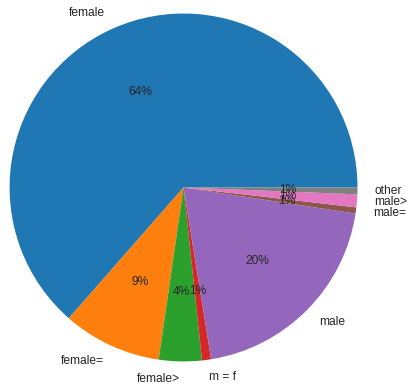

In [27]:
plot = borrowers.groupby(level='gender').sum().plot.pie(y='gen_counts', fontsize=12, autopct='%1.0f%%', labeldistance=1.1, radius=2, legend=None)

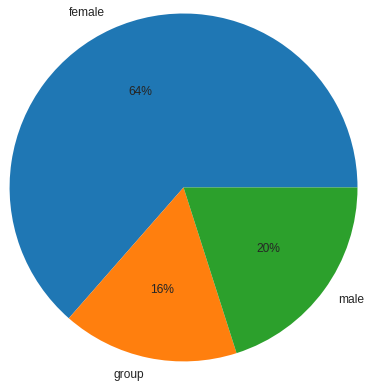

In [28]:
plot = borrowers.groupby(level='gender_group').sum().plot.pie(y='gen_counts', fontsize=12, autopct='%1.0f%%', labeldistance=1.1, radius=2, legend=None)

In [29]:
borrowers.index.get_level_values('gender_group').unique()

Index(['female', 'group', 'male'], dtype='object', name='gender_group')

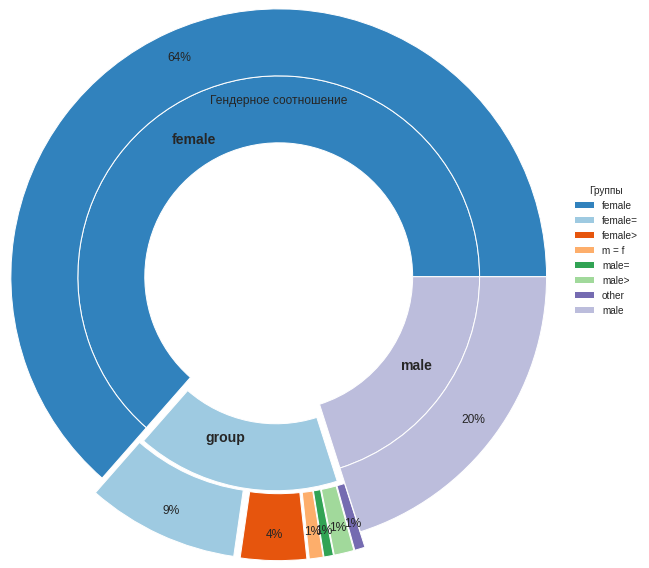

In [30]:
fig, ax = plt.subplots(figsize=(6, 10), subplot_kw=dict(aspect="equal"))

size = 0.5
explode = 0.1
cmap = plt.get_cmap("tab20c")
# outer_colors = cmap(np.arange(3)*4)
# inner_colors = cmap([1, 2, 5, 6, 9, 10])
_range = _range = np.arange(0, len(borrowers)*2, 2)
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(_range)
outer_colors = cmap([_range[0], np.random.choice(_range[1:-1]), _range[-1]])

ax.pie(borrowers.groupby(level=0).sum().values.flatten(), 
       radius=2-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),
       labels=borrowers.index.get_level_values('gender_group').unique(), 
       labeldistance=0.75, textprops=dict(size=14, weight="bold"),
       explode=[0, explode ,0])

wedges, texts, autotexts = ax.pie(borrowers.groupby(level=1).sum()\
       .reindex(borrowers.index.get_level_values('gender'))\
       .values.flatten(), 
       radius=2, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', 
       pctdistance=0.9, textprops=dict(size=12),
       explode=[0 if i in [0, len(borrowers)-1] else explode+0.02 for i in range(len(borrowers))])

ax.legend(wedges, borrowers.index.get_level_values('gender'),
          title="Группы",
          loc="upper right",
          bbox_to_anchor=(1, 0, 0.6, 0.8))

# plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Гендерное соотношение')
plt.show()

### что это может означать?

Например то, что женщины используют Kiva, что бы получить финансирование и развитие собственного проекта в странах (большинство из которых являются страны третьего мира), где традиционно женщинам это было сделать крайне тяжело

**В каких странах подавляющее большинство заёмщиков — женщины?**

In [31]:
ord_columns = ['female', 'female=', 'female>', 'm = f', 'male>', 'male=',  'male']
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index)]\
    .query("gender_group != 'other'")\
    .groupby(['country', 'gender_group'])['gender_group']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('gender_group')\
    .fillna(0)\
    .sort_values(by=ord_columns)

df_gender_by_country = df_gender_by_country[ord_columns]

# df_gender_by_country
# df_gender_by_country = df_gender_by_country[df_gender_by_country.columns[df_gender_by_country.columns != 'other']]

# df_gender_by_country

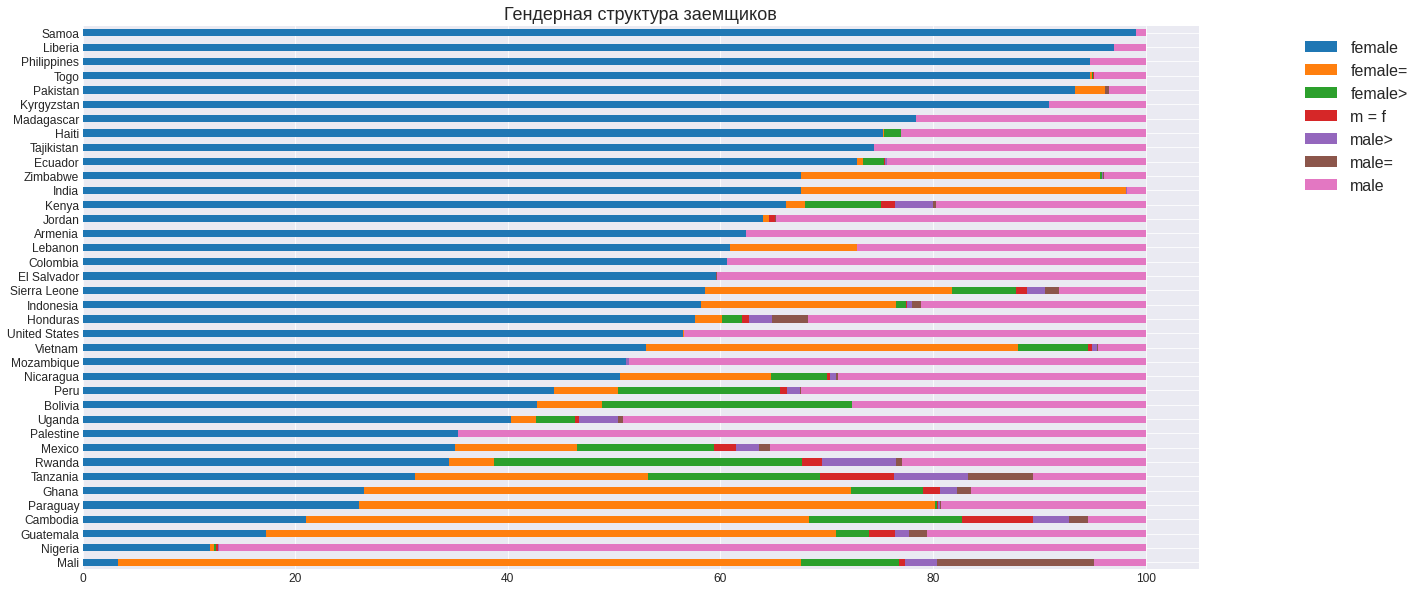

In [32]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=12
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

## Количество займов
***

Посмотрим для чего людям нужны займы и какие суммы они просят

### В разрезе секторов экономики
***

ранее мы видели что всего было 15 уникальных секторов. Рассмотрим как обстоят дела в каждом из них

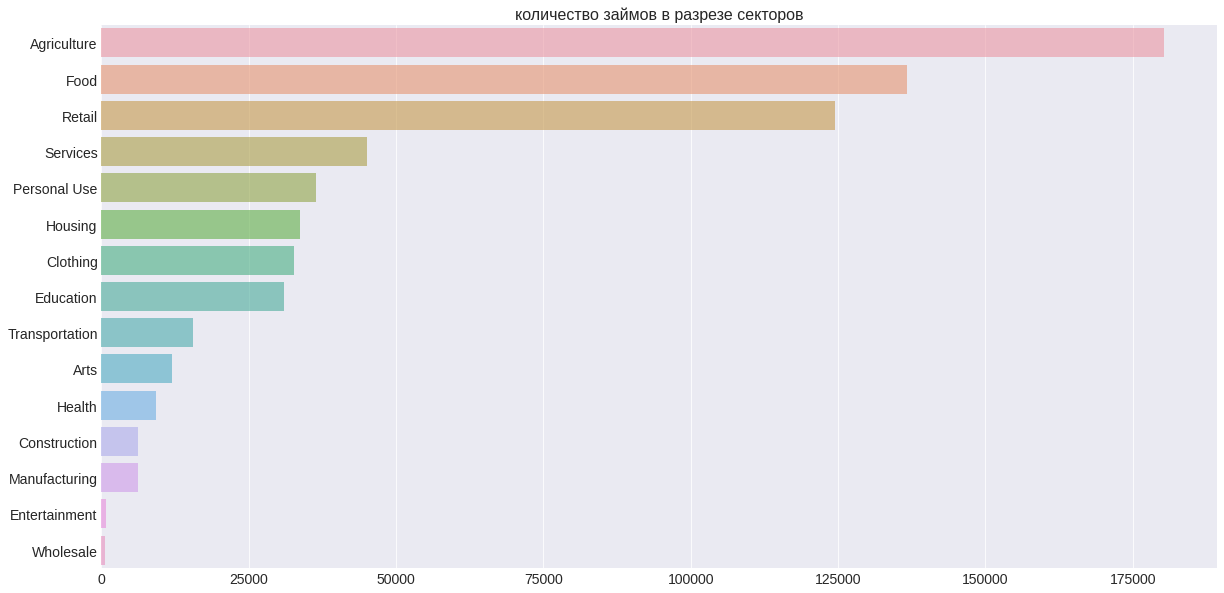

In [33]:
sectors = df_kiva_loans['sector'].value_counts()

plt.figure(figsize=(20, 10))
plt.title('количество займов в разрезе секторов', fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

- Самым доминирующим является **агрокульутрый сектор**, за ним следуют **пищевая промышленность** и **торговля**
- Так же стоит отметить существенные займы на **личные нужды**
- Менее всего берут займы на строительство, промыленное производство, а так же сферы развлечения и оптовой торговли

### В разрезе видов деятельности
***

посмотрим более подробную версию и сделаем подсчет для **видов деятельности**

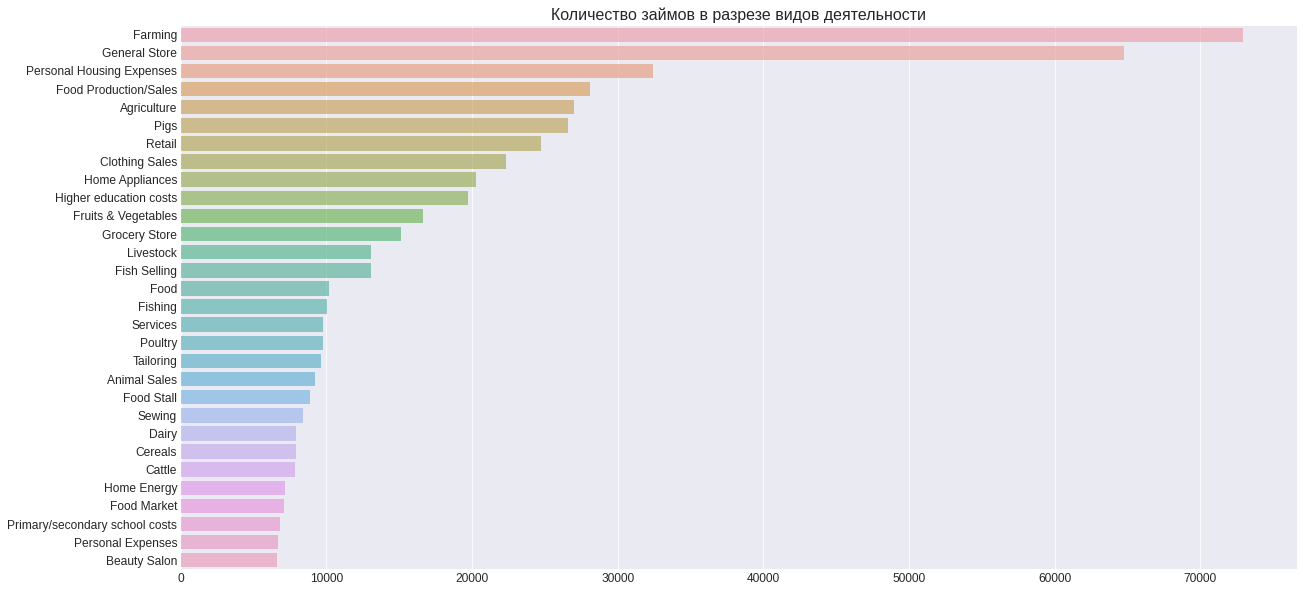

In [34]:
activities = df_kiva_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе видов деятельности', fontsize=16)
plt.tick_params(labelsize=12)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show()

- в лидирующей группе фермерство, розничная торговля, улучщение жилищных условий

интересные выводы можно сделать из детального описания назначения займа

In [35]:
# попытка почистить столбец с назначением займа, что бы получуть репрезентативную групировку
df_kiva_loans['use'] = df_kiva_loans['use'].str.lower().str.replace('\.|her|their|his|\\t|,|the', '', regex=True).str.replace('\ +', ' ', regex=True).str.strip()
df_kiva_loans['use'].value_counts().head(25)

to buy a water filter to provide safe drinking water for family                                                  15320
to build a sanitary toilet for family                                                                             3322
to buy fertilizers and or farm supplies                                                                           2273
to buy ingredients for food production business                                                                   2095
to buy food and clothing eliminating pressure to sell maize for low prices at harvest                             1805
to buy feed and vitamins for pigs                                                                                 1799
to purchase more groceries to sell                                                                                1642
to buy feeds and or supplies to raise pigs                                                                        1614
to buy feed and or supplies to raise pigs       

В лидерах по целевому назначению займов — вещи, удовлетворяющие базовые человеческие потребности, такие как **покупка фильтра для воды**, **оборудование септика**, **светильники на солнечных батареях**.

In [36]:
for country in countries.head(10).index:
    tmp_df = df_kiva_loans[df_kiva_loans['country'] == country]
    print('='*5, '{0} (всего записей {1:.0f})'.format(country, tmp_df.shape[0]), '='*5)
    print(tmp_df['use'].value_counts().head(5))

===== Philippines (всего записей 160441) =====
to build a sanitary toilet for family              3322
to buy fertilizers and or farm supplies            2273
to buy ingredients for food production business    2094
to buy feed and vitamins for pigs                  1795
to buy feeds and or supplies to raise pigs         1612
Name: use, dtype: int64
===== Kenya (всего записей 75825) =====
to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation    1439
to buy farm inputs                                                                                               1224
to purchase hybrid seeds and fertilizer to improve harvests of maize                                             1006
to buy a solar lantern                                                                                            896
to buy poultry                                                                                                    814
Name: use, dtype: i

In [37]:
# в качестве эксперимента изучим займы, где в целях встречается 'питьевая вода'
water_use = df_kiva_loans[df_kiva_loans['use'].str.contains('drinking water').fillna(False)]['use'].value_counts()
df_drinking_water = df_kiva_loans[df_kiva_loans['use'].isin(water_use[water_use>10].index.values)]
pd.pivot_table(df_drinking_water, index='use', columns='country', values='posted_time',  aggfunc=len, fill_value=0)

country,Cambodia,Indonesia,Kenya,Lao People's Democratic Republic,Philippines,Uganda
use,,,,,,
buy a water filter to provide safe drinking water for family,22,0,0,0,0,0
to buy a water filter and provide safe drinking water for family,18,0,0,0,0,0
to buy a water filter in order to provide safe drinking water for family,36,0,0,0,0,0
to buy a water filter that will provide safe drinking water for family,15,0,0,0,0,0
to buy a water filter to provide safe drinking water,44,0,0,0,0,0
to buy a water filter to provide safe drinking water for families,45,0,0,0,0,0
to buy a water filter to provide safe drinking water for family,15320,0,0,0,0,0
to buy a water filter to provide safe drinking water for or family,23,0,0,0,0,0
to buy a water filter to provide safe drinking water to families,11,0,0,0,0,0


In [38]:
df_drinking_water['country'].value_counts()

Cambodia                            15667
Lao People's Democratic Republic     1310
Uganda                               1027
Kenya                                 227
Philippines                            40
Indonesia                              20
Name: country, dtype: int64

выполненный анализ показывает, что поле цель займа очень замусарен различными вариантами написания одних и тех же по сути вещей и требуется более глубокий анализ для семантической группировки значений. Тем не менее даже по этому анализу заметно лидеры стран, где очень плачевная ситуация с наличием чистой питьевой воды, особенно выделяется **Камбоджия** и **Лаос** находящиеся по соседству.

### Наиболее популярные виды деятельности
***

Посмотрим на наиболее популярные направления займов. Для этого сгруппируем займы по признакам **sector, activity** и посмотрим топ-10 каждой группы

In [39]:
loans_by_activity_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index)]\
    .groupby(['sector', 'activity'])['loan_amount']\
    .count()\
    .reset_index()

In [40]:
loans_by_activity_sector

,sector,activity,loan_amount
0,Agriculture,Agriculture,27023
1,Agriculture,Animal Sales,9237
2,Agriculture,Aquaculture,108
3,Agriculture,Beekeeping,50
4,Agriculture,Cattle,7865
...,...,...,...
124,Services,Water Distribution,564
125,Transportation,Motorcycle Transport,5888
126,Transportation,Rickshaw,2878
127,Transportation,Taxi,2631


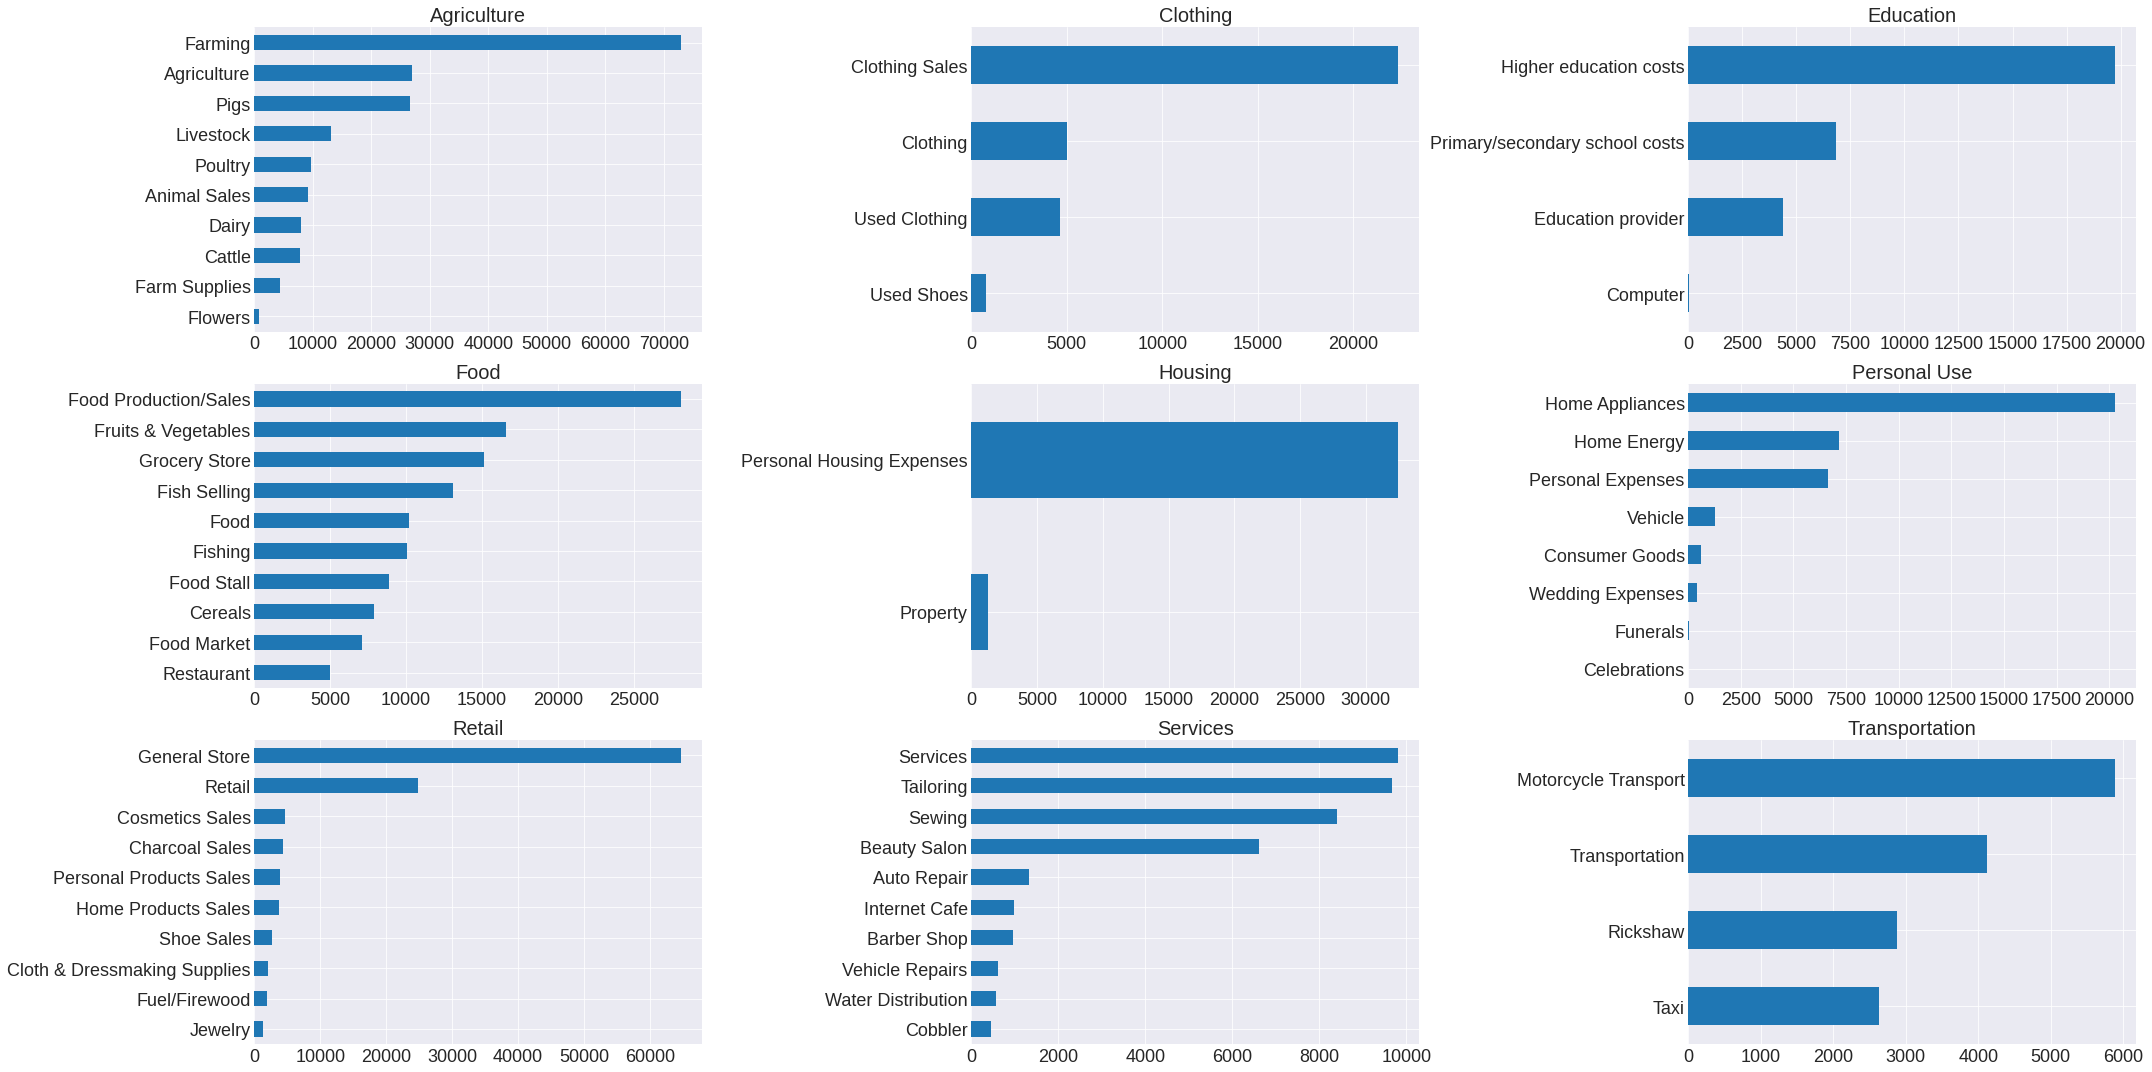

In [41]:
fig, axs = plt.subplots(3, 3, sharex=False, squeeze=False, figsize=(30, 15))

for ax, q, in zip(axs.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)].dropna().sort_values(by='loan_amount')[-10:]
        
#     ax.barh(tmp_df.activity, tmp_df.loan_amount, align='center')
#     ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)    
    plt.tight_layout()
#     
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)


In [42]:
df_kiva_loans.isna().sum(axis=0) / len(df_kiva_loans) * 100

funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.630508
country_code           0.001192
country                0.000000
region                 8.462392
currency               0.000000
partner_id             2.012351
posted_time            0.000000
disbursed_time         0.356970
funded_time            7.200632
term_in_months         0.000000
lender_count           0.000000
tags                  25.538546
borrower_genders       0.628869
repayment_interval     0.000000
date                   0.000000
ISO                   12.032836
world_region          12.032836
MPI                   12.032836
gender_group           0.000000
dtype: float64

## Объем финансирования 

### Распределение суммы займа
***
Не менее важную информацию могуь дать абсолютные значения займов, которые люди в разных странах запрашивают на реализацию своих целей.
Давайте посмотрим на график распределение сумм займов.

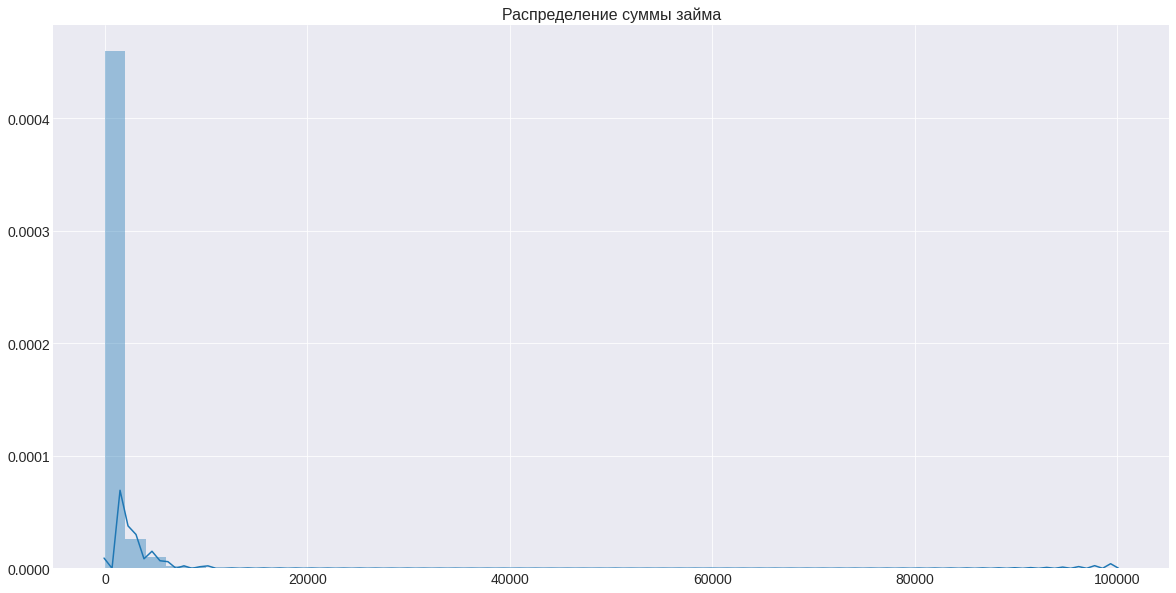

In [43]:
plt.figure(figsize=(20, 10))
plt.title('Распределение суммы займа', fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, и график не очень информативен в этой форме: нам нужно **усечь данные**, исключив тем самым выбросы из рассмотрения. 
Предлагается использовать основное, но очень мощное правило: **_правило 3-х сигм_ 68-95-99,7**. Это правило гласит, что для нормального распределения:
- **68,27%** значений $\in \left[\mu - \sigma, \mu + \sigma\right]$
- **95,45%** значений $\in \left[\mu - 2\sigma, \mu + 2\sigma\right]$
- **99,70%** значений $\in \left[\mu - 3\sigma, \mu + 3\sigma\right]$

где **$\mu$** и **$\sigma$** - среднее значение и стандартное отклонение нормального распределения.

Здесь верно, что распределение не обязательно нормальное, но для формы, подобной той, которая у нас мы увидим, что применение третьего фильтра **значительно улучшит наши результаты**.

<img src=https://smart-lab.ru/uploads/images/02/18/66/2016/03/13/8d39f0.jpg width="600px"> 


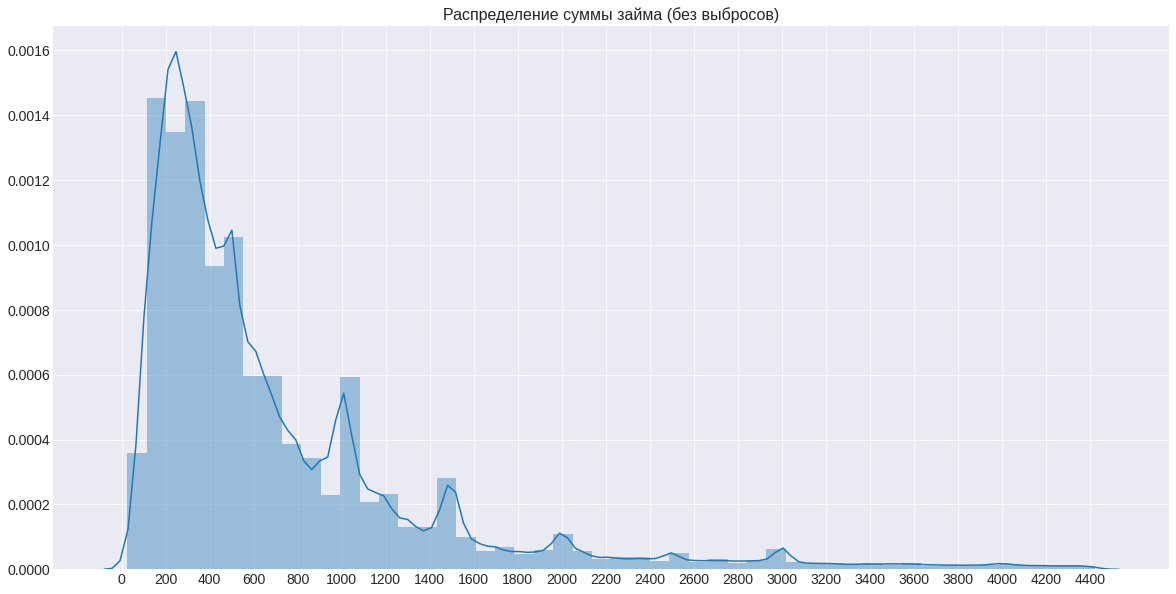

In [44]:
# наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение 
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных 
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20, 10))
plt.title('Распределение суммы займа (без выбросов)', fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

### Суммы займа в разрезе секторов
***
Давайте посмотрим на разбиение сумм кредидов по секторам экономики

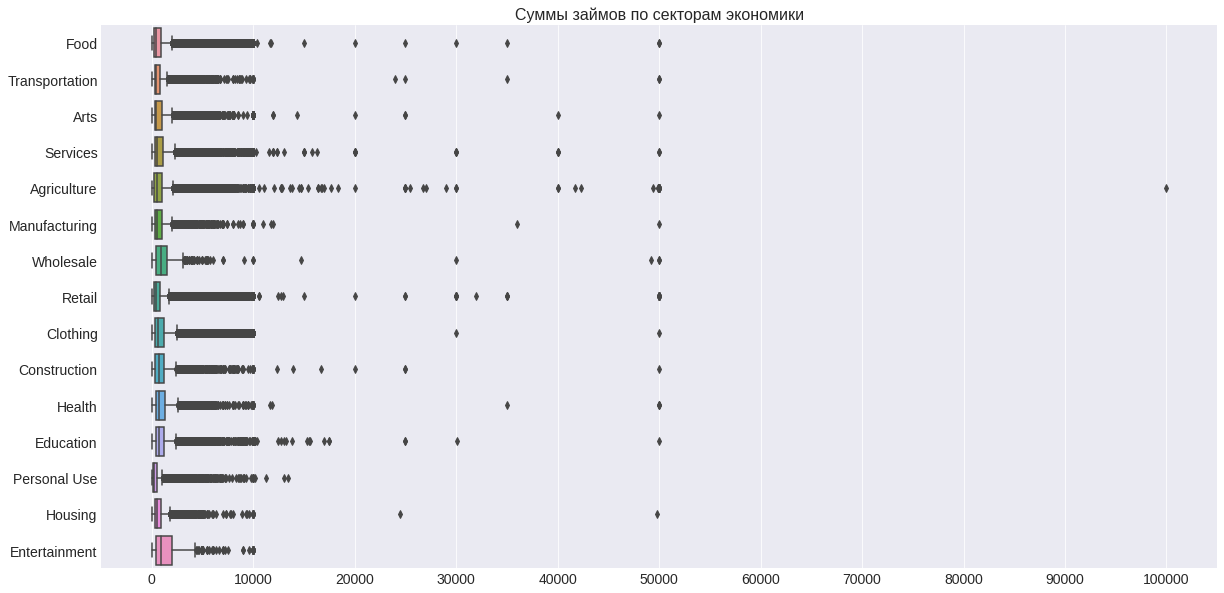

In [45]:
plt.figure(figsize=(20,10))
plt.title('Суммы займов по секторам экономики', fontsize=16)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='sector', data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

Как видно, для любого сектора есть значения-выбросы. Почти для всех секторов, кроме **Личные нужды** и **Развлечения**, наличие займов на суммы в районе *\$50.000* 

Можно наблюдать что есть займ на 100 000 для сельского проекта. Есть немного случаев займов на суммы 20К, 50К

***
Рассмотрим на среднее и медианное значения суммы займа по секторам экономики

In [46]:
sector_mean_median = df_kiva_loans\
    .groupby(['sector'])['loan_amount']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)
sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


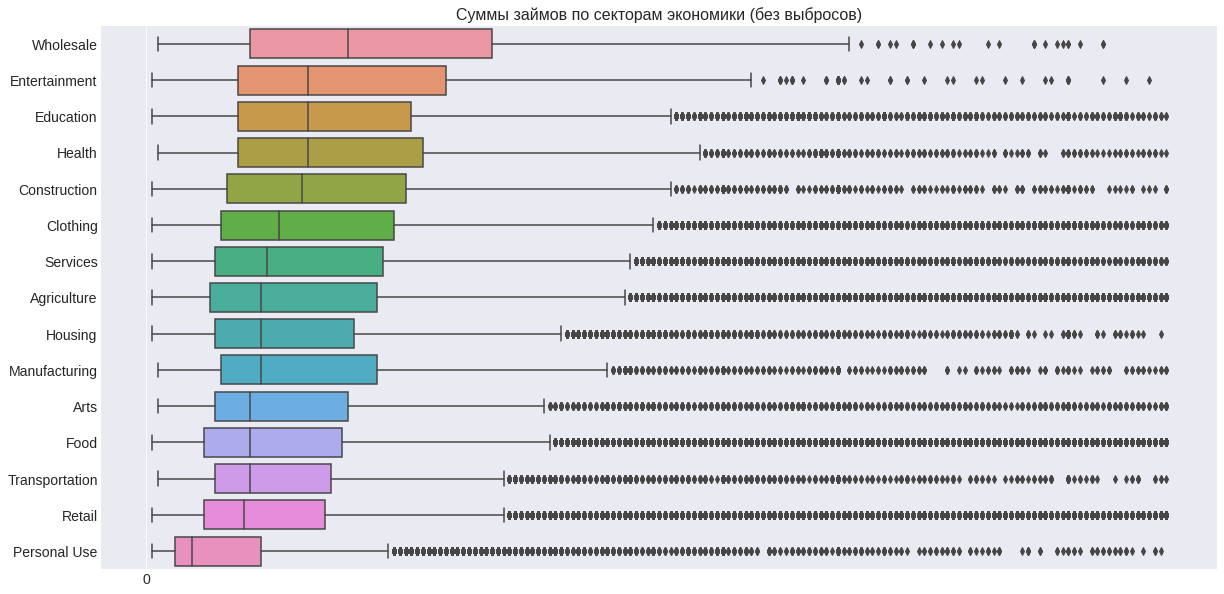

In [47]:
plt.figure(figsize=(20,10))
plt.title('Суммы займов по секторам экономики (без выбросов)', fontsize=16)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='sector', data=df_kiva_loans_trimmed, order=sort_order).set(ylabel=None, xlabel=None)
plt.show()

Прежде всего нужно отметить, что именно медиана дает **робастную** (устойчивую к выбросам) оценку центрального положения суммы займа.

Из графика становится ясно, что медиана суммы заявок на **Личные нужды** обладает наименьшими значениями. Личные нужды включают предметы обихода и первой необходимости, обеспечение жилища энергией, теплом и водой. Именно эта группа заявок может свидетельствовать о случаях крайней нужды и бедности в различных странах.

На другой стороне графика сектора с самыми большими показателями медианы суммы займа: **Оптовая торговля**, требующая значительных затрат на закупку; **Образование** и **Здоровье**, а так же **Сфера развлечений**

#### Рассмотрение самых больших займов
***
Выделим ТОП-10 уникальных сумм займов и рассмотрим набор данных в которых они встречаются

In [48]:
# Выделим ТОП-10 уникальныъ запрошенных займов
largest_amount_loans =  df_kiva_loans.loan_amount.sort_values(ascending=False).unique()[:10]
# Наложим фильтр для отбора записей состоящие из ТОП-10 самых большиз сумм займов
df_kiva_biggest_loans = df_kiva_loans.loc[df_kiva_loans.loan_amount.isin(largest_amount_loans)]

In [49]:
# Посмотрим ТОП- записей с самыми большими суммами займов
df_kiva_biggest_loans.loc[df_kiva_biggest_loans.loan_amount.nlargest(5).index]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI,gender_group
70499,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,...,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10,HTI,Latin America and Caribbean,0.293800,female
34196,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell barefoot power's solar lightin...,PE,Peru,Arequipa,USD,212.0,...,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21,PER,Latin America and Caribbean,0.053080,male
43182,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell barefoot power's solar lightin...,KE,Kenya,Nairobi,USD,212.0,...,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09,KEN,Sub-Saharan Africa,0.209375,male
53634,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell barefoot power solar lighting,UG,Uganda,Kampala,USD,212.0,...,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06,UGA,Sub-Saharan Africa,0.375300,female
126839,50000.0,50000.0,Agriculture,Agriculture,to buy and plant resin producing pine trees re...,MX,Mexico,Cherán,USD,376.0,...,144.0,586,"user_favorite, user_favorite, #Biz Durable Ass...","male, male, male, male, male, male, male, female",irregular,2014-10-01,MEX,Latin America and Caribbean,0.000000,male>


In [50]:
pd.pivot_table(df_kiva_biggest_loans, index=['country'], columns='sector', values='loan_amount', aggfunc='sum', fill_value=0)

sector,Agriculture,Arts,Clothing,Construction,Education,Food,Health,Housing,Manufacturing,Retail,Services,Transportation,Wholesale
country,,,,,,,,,,,,,
Albania,0,0,50000,0,0,0,0,0,0,0,0,0,0
Benin,50000,0,0,0,0,0,0,0,0,0,0,0,0
Chile,49925,0,0,0,0,0,0,0,0,0,0,0,0
Colombia,0,0,0,0,0,0,0,0,0,0,40000,0,0
Cote D'Ivoire,50000,0,0,0,0,0,0,0,0,0,0,0,0
Ecuador,50000,0,0,0,0,0,0,0,0,0,0,0,0
Ghana,50000,40000,0,0,0,0,50000,0,0,0,100000,0,0
Guatemala,50000,0,0,0,0,0,0,0,0,0,0,0,0
Haiti,100000,0,0,0,0,0,0,0,0,49950,0,0,100000


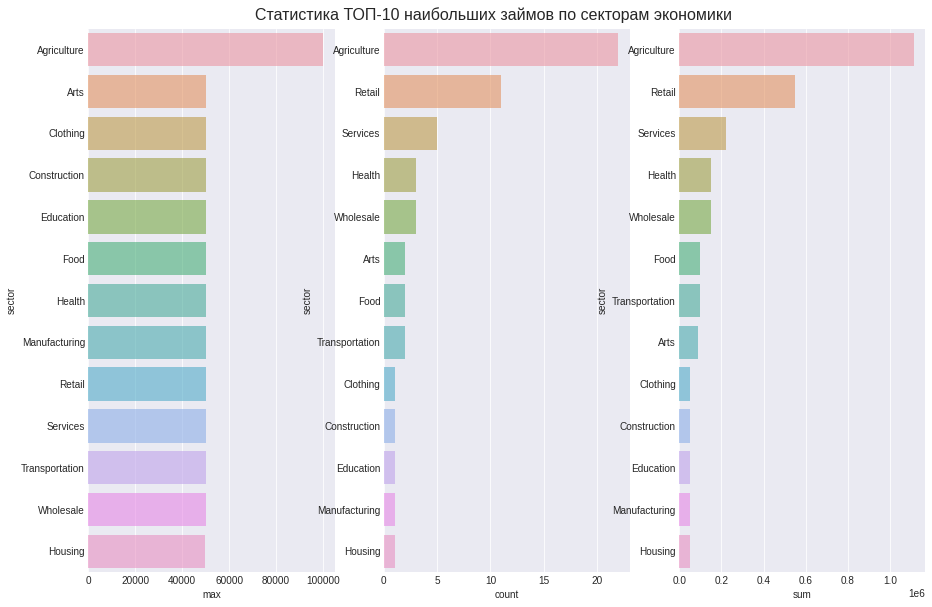

In [51]:
# Создадим агрегационную таблицу сгрупированную по полю секторам экономики
df_biggest_agg = df_kiva_biggest_loans.groupby(['sector'])['loan_amount'].agg(['max', 'count', 'sum',])

cols = df_biggest_agg.columns.size
fig, axs = plt.subplots(figsize=(5*cols,10),ncols=cols)
fig.suptitle('Статистика ТОП-10 наибольших займов по секторам экономики', fontsize=16, y=.91)

for i in range(cols):
    col_name = df_biggest_agg.columns[i]
    df_biggest_agg.sort_values(by=col_name, ascending=False, inplace=True)
    sns.barplot(y=df_biggest_agg.index, x=df_biggest_agg[col_name], alpha=0.6, ax=axs[i])

plt.show()


Рассматривая наибольшие займы в разрезе секторов экономики, можно отметить, что доминирует **Агрокультурный сектор**: в нем был запрошен самый большой займ, в нем наибольшее количество крупных займов и соответственно сумма займов. Так же можно выделить **Розничную торговлю** и **Сферу услуг**, которые следуют за доминантом по количеству и общей сумме займов.

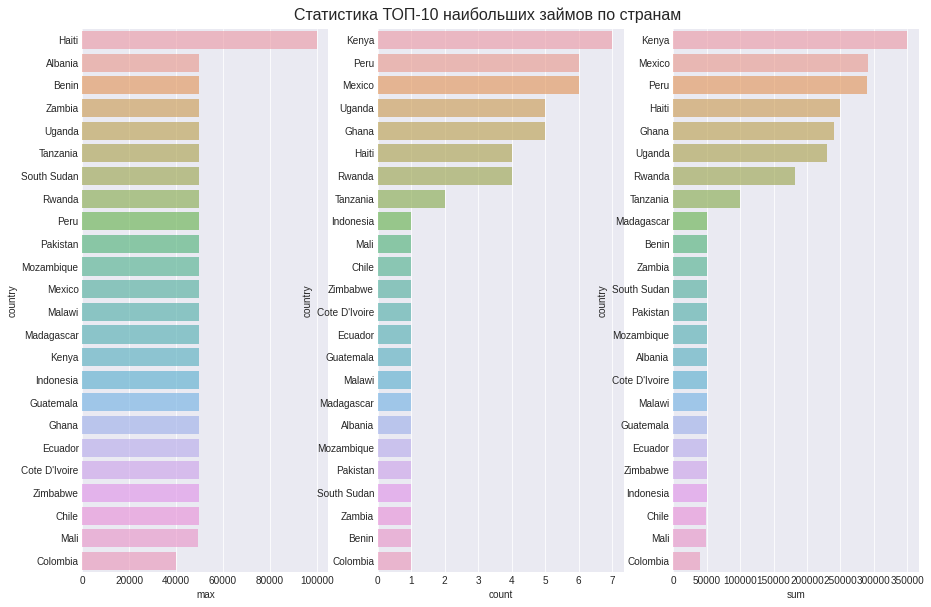

In [52]:
# Создадим агрегационную таблицу сгрупированную по полю Страна
df_biggest_agg = df_kiva_biggest_loans.groupby(['country'])['loan_amount'].agg(['max', 'count', 'sum'])

cols = df_biggest_agg.columns.size
fig, axs = plt.subplots(figsize=(5*cols,10),ncols=cols)
fig.suptitle('Статистика ТОП-10 наибольших займов по странам', fontsize=16, y=.91)

for i in range(cols):
    col_name = df_biggest_agg.columns[i]
    df_biggest_agg.sort_values(by=col_name, ascending=False, inplace=True)
    sns.barplot(y=df_biggest_agg.index, x=df_biggest_agg[col_name], alpha=0.6, ax=axs[i])

plt.show()

На графике видно, что самый большой кредит был выдан в **Гаити** на сумму **_$100`000_**, тем не менее по количеству и сумме наибольших займов лидирует **Кения** и рядом с ней соседствуют **Мексика** и **Перу**

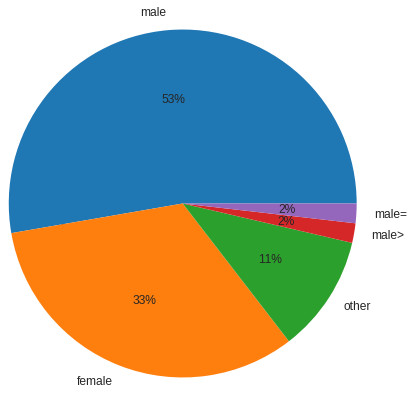

In [53]:
df_kiva_biggest_loans['gender_group'].value_counts().plot.pie(fontsize=12, autopct='%1.0f%%', labeldistance=1.1, radius=2, legend=None)

Гендерное распределение наибольших займов перераспределяет предыдущую картину, где доминирующее положение занимали женщины. На графике видно, что займы с крупными суммами берут больше мужчины. Хотя наибольшей займ на сумму **_$100`000_** был запрошен женщиной. 

#### Рассмотрение займов составивших "выброс"
***


In [54]:
df_kiva_biggest_loans = df_kiva_loans[(dev>3*std)]
df_kiva_biggest_loans.describe(include='number')

,funded_amount,loan_amount,partner_id,term_in_months,lender_count,MPI
count,15352.000000,15352.000000,12059.000000,15352.000000,15352.000000,5749.000000
mean,5586.108976,6282.033286,142.448296,17.567548,105.877019,0.146467
std,3532.103032,3365.350610,96.899549,17.699071,112.387537,0.125507
min,0.000000,4450.000000,9.000000,2.000000,0.000000,0.000000
25%,4725.000000,5000.000000,59.000000,6.000000,34.000000,0.053080
50%,5200.000000,5425.000000,122.000000,9.000000,96.000000,0.113957
75%,6150.000000,6425.000000,161.000000,24.000000,152.000000,0.242800
max,100000.000000,100000.000000,536.000000,158.000000,2986.000000,0.549778


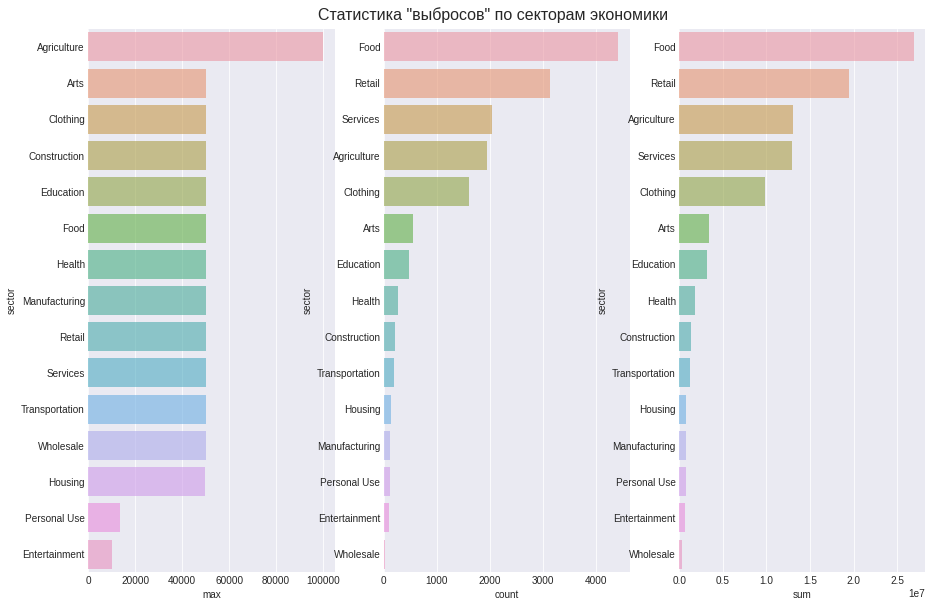

In [55]:
# Создадим агрегационную таблицу сгрупированную по полю секторам экономики
df_biggest_agg = df_kiva_biggest_loans.groupby(['sector'])['loan_amount'].agg(['max', 'count', 'sum',])

cols = df_biggest_agg.columns.size
fig, axs = plt.subplots(figsize=(5*cols,10),ncols=cols)
fig.suptitle('Статистика "выбросов" по секторам экономики', fontsize=16, y=.91)

for i in range(cols):
    col_name = df_biggest_agg.columns[i]
    df_biggest_agg.sort_values(by=col_name, ascending=False, inplace=True)
    sns.barplot(y=df_biggest_agg.index, x=df_biggest_agg[col_name], alpha=0.6, ax=axs[i])

plt.show()


В выбросах ожидаемо самый большой займ находится в **Агрокультурном секторе**, так как наибольшие займы являются подмножеством выбросов. Тем не менее в статистике по количеству и общей сумме займов произошло перераспределение мест. Лидером стал **Пищевой сектор** экономики. А вот **Розничная торговля** и **Сфера услуг**, по прежнему следуют за доминантом по количеству и общей сумме займов.

Еще одно наблюдение можно сделать по секторам **"Оптовых продаж"** и **"Развлечений"** - эти сектора занимали лидирующие позиции по медианному показателю сумм займов, в выборке с исключенным выбросом. В графиках выше рассматриваемые сектора занимают последние позиции по количеству и общей сумме займов.

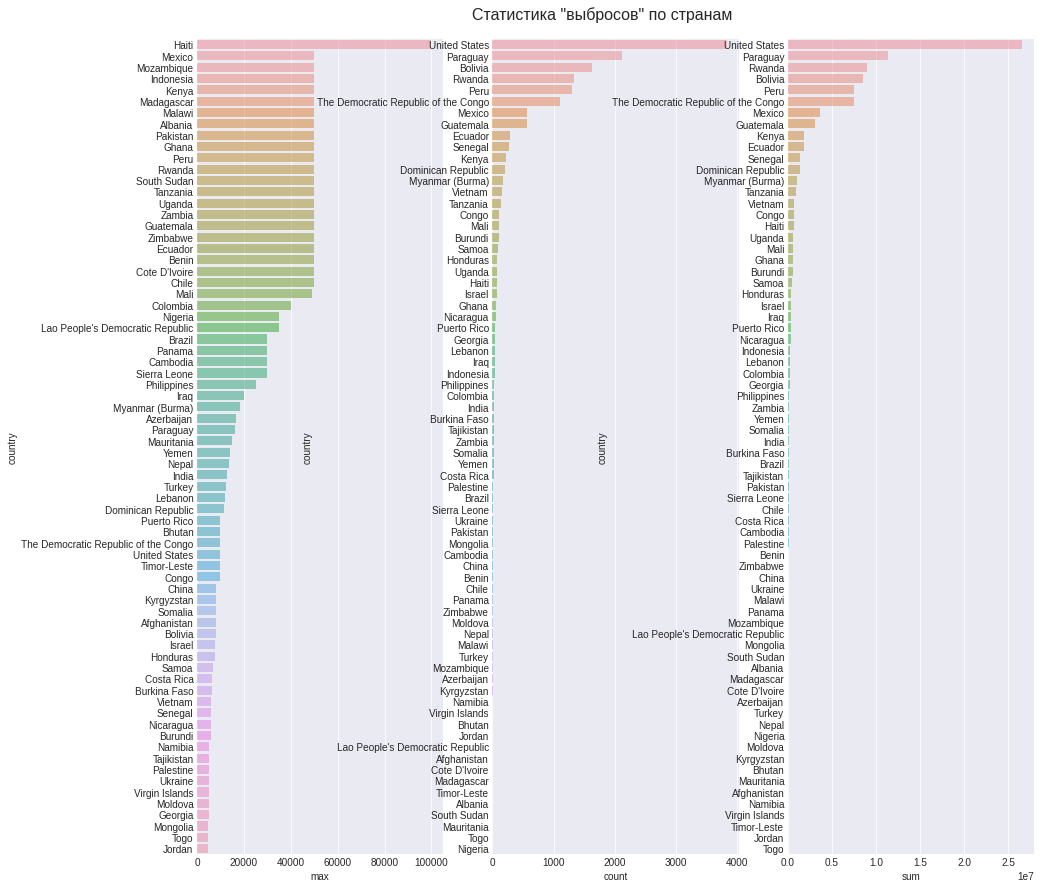

In [56]:
# Создадим агрегационную таблицу сгрупированную по полю Страна
df_biggest_agg = df_kiva_biggest_loans.groupby(['country'])['loan_amount'].agg(['max', 'count', 'sum'])

cols = df_biggest_agg.columns.size
fig, axs = plt.subplots(figsize=(5*cols,15),ncols=cols)
fig.suptitle('Статистика "выбросов" по странам', fontsize=16, y=.91)

for i in range(cols):
    col_name = df_biggest_agg.columns[i]
    df_biggest_agg.sort_values(by=col_name, ascending=False, inplace=True)
    sns.barplot(y=df_biggest_agg.index, x=df_biggest_agg[col_name], alpha=0.6, ax=axs[i])

plt.show()

В выбросах неожиданно первое место с существенным отрывом по количеству и суммарным займам заняли **США**, при том что максимальный займ по стране не превышает $10'000

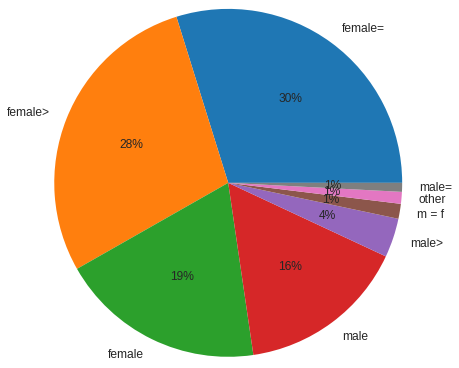

In [57]:
df_kiva_biggest_loans['gender_group'].value_counts().plot.pie(fontsize=12, autopct='%1.0f%%', labeldistance=1.1, radius=2, legend=None)

Гендерное распределение выбросов не сильно отличается от совокупных данных, за исключением того, что доля займов только одной женщиной распределилась в женские коллективы (где женщин больше чем мужчин, либо состоят только из женщин). 

### Распределение по макрорегионам
***

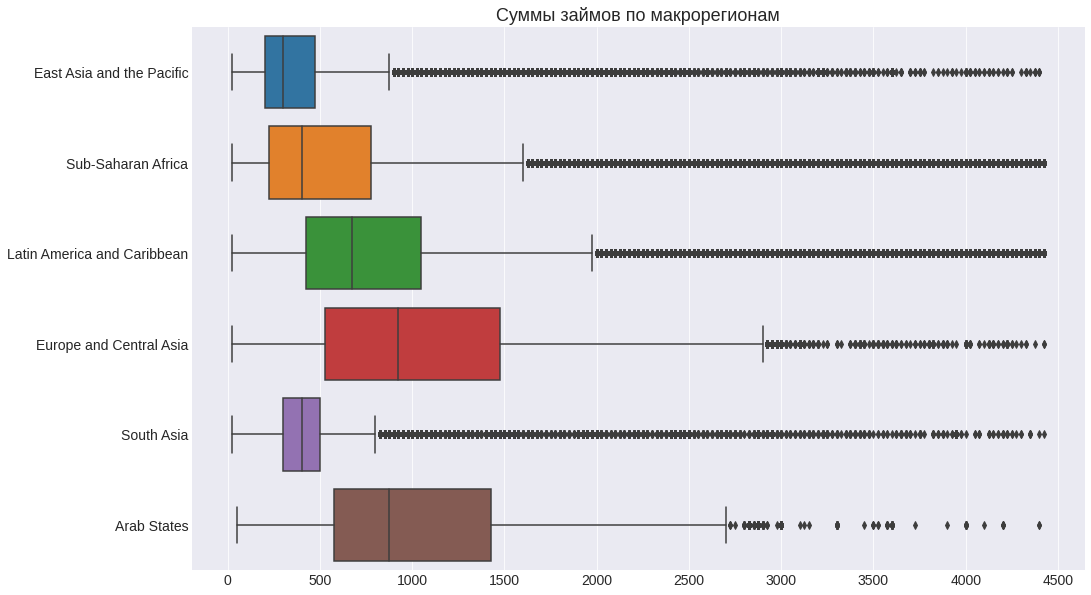

In [58]:
plt.figure(figsize=(16,10))
plt.title('Суммы займов по макрорегионам', fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount'])+1, 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='world_region', order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
plt.show()

Регионы расположены в порядке убывания количества займов (в соответствии с графиком, полученным в п. 2.2.1)

Скорее всего, те регионы, в которых медианное значение ниже, в целом беднее и требуют финансирования короткими, небольшими, но частыми займами. Эту ситуацию наблюдаем в регионе **Юго-Восточная Азия**, лидерами в котором являются **Филипины** и **Камбоджи**

Однако на этом графике можно заметить регион, который выбивается из последовательности: **Южная Азия** и, в частности, такие страны как **Пакистан** и **Индия**. Вполне вероятно, что в этом регионе есть отличная площадка для расширения присутствия и поддержки со стороны сообщества **Kiva**

попробовать найти связь, между странами (макрорегионами), полом и суммой займа (самостоятельно)

In [59]:
x = [[x,y] for x,y in enumerate(df_kiva_loans_trimmed['world_region'].unique().tolist())]
df_kiva_loans_trimmed[df_kiva_loans_trimmed.world_region.eq(x[0][1])].head()



,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI,gender_group
0,300.0,300.0,Fruits & Vegetables,Food,to buy seasonal fresh fruits to sell,PK,Pakistan,Lahore,PKR,247.0,...,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167,female
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain auto rickshaw used in b...,PK,Pakistan,Lahore,PKR,247.0,...,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,South Asia,0.233167,female=
2,150.0,150.0,Transportation,Transportation,to repair old cycle-van and buy anor one to re...,IN,India,Maynaguri,INR,334.0,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000,female
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,...,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167,female
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo,PK,Pakistan,Abdul Hakeem,PKR,245.0,...,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167,female


In [60]:
df_kiva_loans_trimmed[
    df_kiva_loans_trimmed['world_region'].eq('Arab States')
    
    & df_kiva_loans_trimmed['gender_group'].eq('male')
]['loan_amount'].median()

750.0

In [61]:
df_country_gender_median = df_kiva_loans_trimmed.groupby(by=['world_region', 'gender_group'])\
    .agg({'loan_amount': ['median', 'sum']})\
    .reset_index()
# df_country_gender_median.columns = df_country_gender_median.columns.to_flat_index()
# df_country_gender_median
# ['_'.join(x).strip('_') for x in df_country_gender_median.columns.to_flat_index()]
df_country_gender_median.columns = ["_".join(col_name).rstrip('_') for col_name in df_country_gender_median.columns.to_flat_index()]
df_country_gender_median = df_country_gender_median[df_country_gender_median['gender_group'].ne('other')]
gender_order = df_country_gender_median['gender_group'].unique().tolist()
gender_order = gender_order[:4] + gender_order[-3:][::-1]

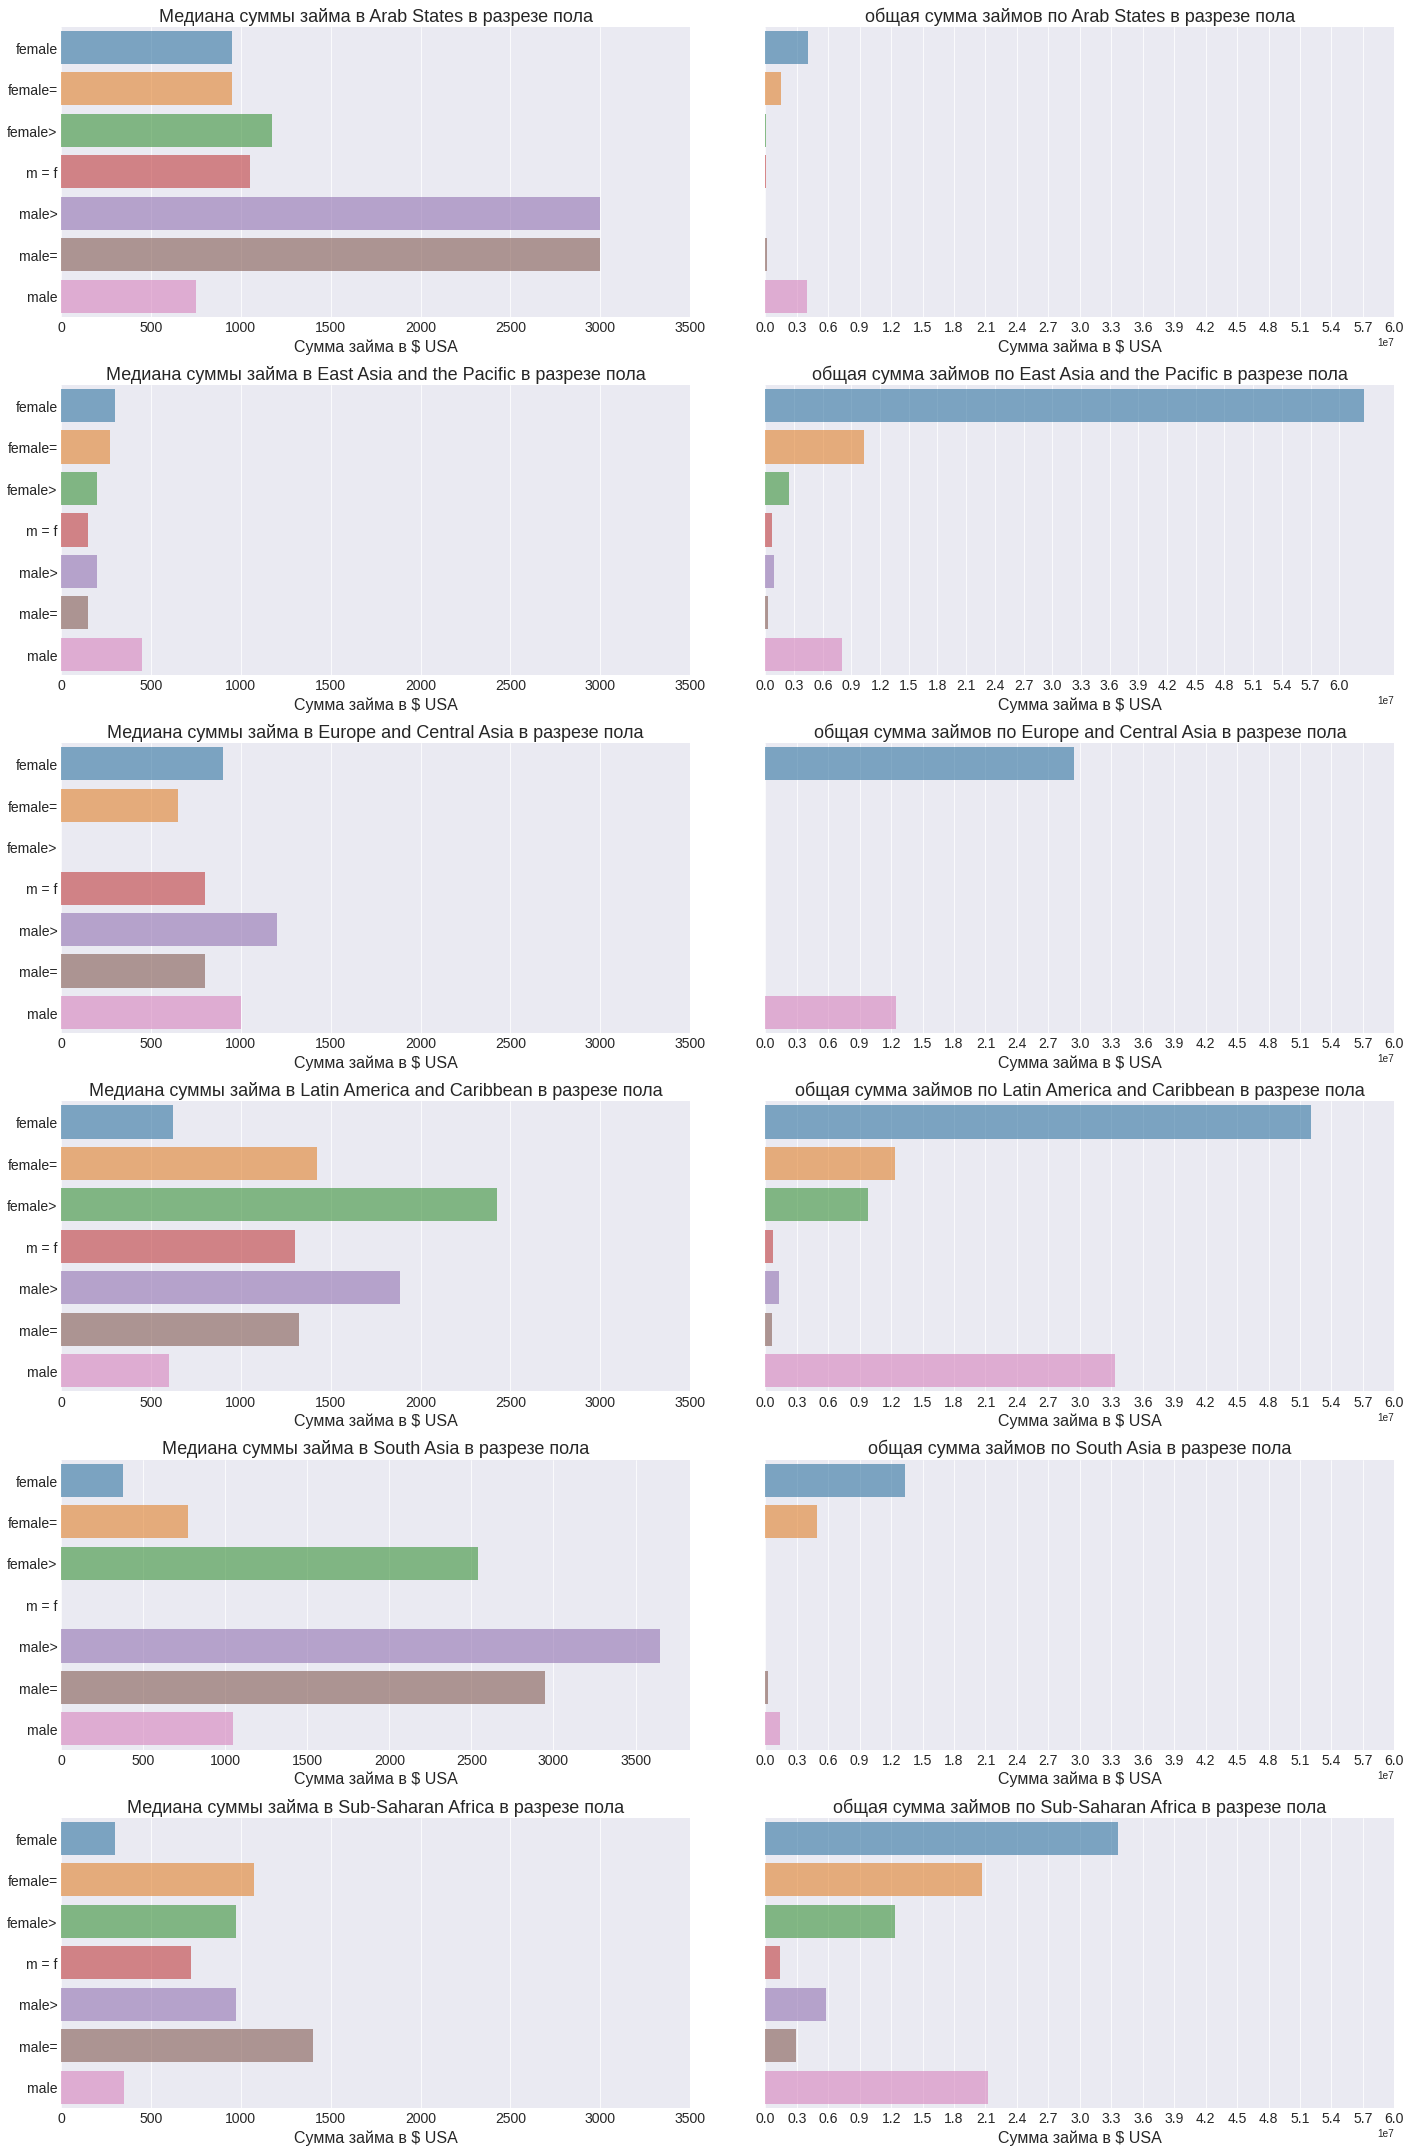

In [63]:
figh, figw = 10, 5
cols = 2
rows = df_country_gender_median['world_region'].unique().size 
# wr_count = df_country_gender_median['world_region'].unique().size 
# rows = wr_count if wr_count%2 == 0 else wr_count + 1
# rows //= cols
xticks_medium = np.arange(0, max(df_country_gender_median['loan_amount_median']+1), 500)
xticks_sum = np.arange(0, max(df_country_gender_median['loan_amount_sum']+1), 3e6)


fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=True, figsize=(figh*cols, figw*rows))
# axs = axs.flatten()

for i, wr in enumerate(df_country_gender_median['world_region'].unique().tolist()):
    tmp_df = df_country_gender_median[df_country_gender_median.world_region.eq(wr)].dropna()
    
    sns.barplot(y='gender_group', x='loan_amount_median', order=gender_order, data=tmp_df, alpha=.6, ax=axs[i][0])
    
    axs[i][0].set_title(f"Медиана суммы займа в {wr} в разрезе пола", fontsize=18)
    axs[i][0].set_xlabel('Сумма займа в $ USA', fontsize=16)
    axs[i][0].set_xticks(xticks_medium)
    axs[i][0].set_ylabel(None)
    axs[i][0].tick_params(labelsize=14)
    
    sns.barplot(y='gender_group', x='loan_amount_sum', order=gender_order, data=tmp_df, alpha=.6, ax=axs[i][1])
    
    axs[i][1].set_title(f"общая сумма займов по {wr} в разрезе пола", fontsize=18)
    axs[i][1].set_xlabel('Сумма займа в $ USA', fontsize=16)
    axs[i][1].set_xticks(xticks_sum)
    axs[i][1].set_ylabel(None)
    axs[i][1].tick_params(labelsize=14)
        
#     ax.barh(tmp_df.activity, tmp_df.loan_amount, align='center')
#     ax.tick_params(axis='both', which='major', labelsize=18)
    
#     ax.set_title(q, fontsize=20)
#     ax.yaxis.label.set_visible(False)    
plt.tight_layout()
plt.show()  
    


Приведенные сравниетельные графики по показателю **медианы суммы займа** в разрезе мировых регионов и гендерной принадлежности заемщиков показывает, что займы свыше **$1000** женщинами практически не запрашиваются или толькр в группе заемшиков. Мужчины чаще запрашивают займы с крупной суммой займа. 

Если рассматривать **общие суммы займов** за весь изучаемый период, то можно заметить, что в **Европейском регионе**, **Центральной** и **Южной Азии** практически отсутствуют займы в группе заемщиков, в низ привалирует индивидуальные займы. 

## Время ожидания средств
***

Итак, мы увидили, где Kiva наиболее популярна, типы деятельности и заемщиков, которые нуждаются в деньгах, а также сколько денег они обычно просят.

Сдедующий интересный вопрос, который можно задать, как долго им действительно приходится ждать финансирования? К счастью, есть две колонки, которые могут помочь в этом исследовании:
- **posted_time**: соответствует дате + точный час, когда заявка появилась на сайте;
- **disbursed_time**: соответствует дате + точный час, когда деньги фактически получены адресатом.

1. Отбрасываем строки с пропущенными значениями для "disbursed_time", получаем столбцы в правильном формате
2. Вычисляем интервал между датами
3. Исключим из рассмотрения заявки, для которых деньги сначало фактически выдаются агентами на местах и только потом публикуются на сайте.

In [64]:
# drop na (missing) vlues
df_loans_date = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# dates columns
dates = ['posted_time', 'disbursed_time']

# format dates:
# df_loans_date[dates] = df_loans_date[dates].applymap(lambda x: x.split('+')[0])
# df_loans_date[dates] = df_loans_date[dates].apply(pd.to_datetime)

# calculate time interval 
df_loans_date.loc[:, 'time_funding'] = df_loans_date[dates[1]] - df_loans_date[dates[0]]
df_loans_date.loc[:, 'time_funding'] = df_loans_date['time_funding'] / timedelta(days=1)

# remove outliers +- 3 sigma
dev = (df_loans_date['time_funding']-df_loans_date['time_funding'].mean()).abs()
std = df_loans_date['time_funding'].std()
# keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_date[~(dev>3*std) & (df_loans_date.loc[:, 'time_funding']>0)]

/home/pro100v/dev/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/pro100v/dev/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Количество дней до полного финансирования заявки
***
Построим график распределения количества дней до полного финансирования

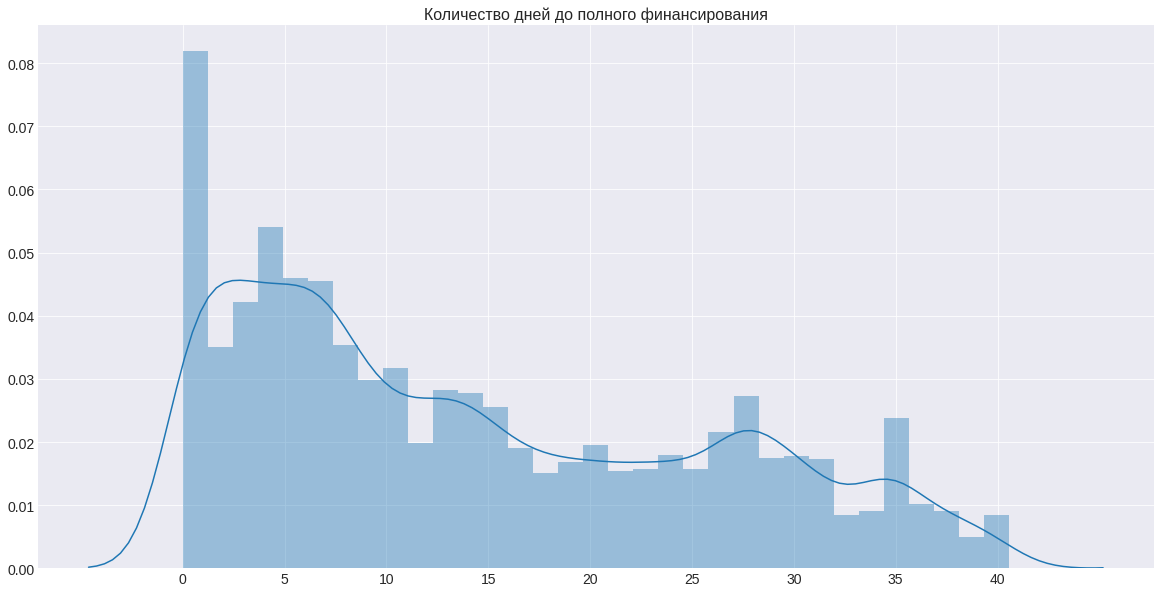

In [65]:
plt.figure(figsize=(20,10))
plt.title('Количество дней до полного финансирования', fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

Большая часть заявок финансируется в течении 10 дней.

Однако также очевидно и наличие пиков в районе 27, 35 дней. Это уже может свидетельствовать о том, что часть заявок проходит длительный процесс финансирования

### 2.5.2. Время ожидания и суммы займов 
***

Для визуализации зависимости суммы займа и временного интервала финансирования давайте построим **тепловую карту**:

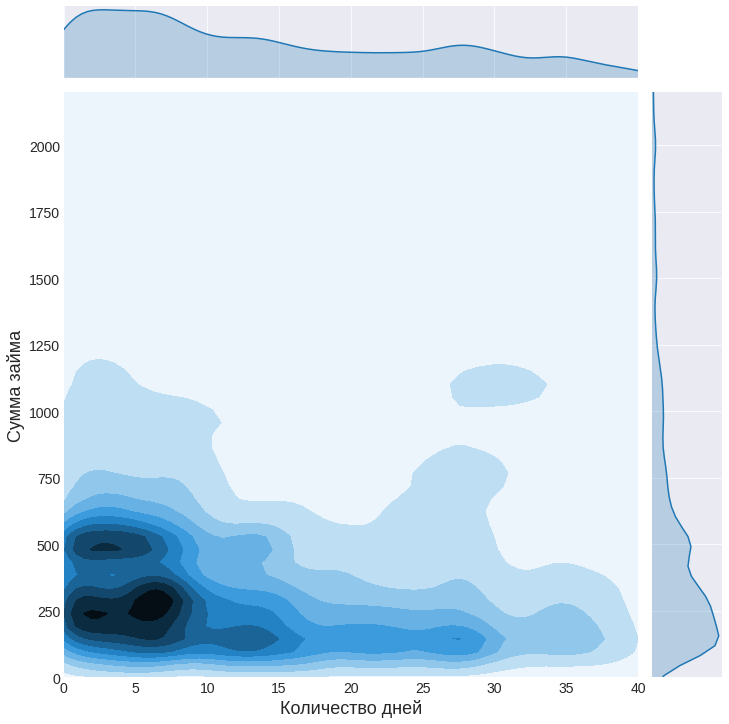

In [66]:
p = sns.jointplot(x="time_funding", y="loan_amount", data=df_loans_dates_trimmed, kind='kde', height=10, ratio=7, xlim=[0,40] , ylim=[0,2200])\
        .set_axis_labels("Количество дней", "Сумма займа", size=18)

# p.ax_joint.set_xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
# p.ax_joint.set_yticks(np.arange(0, max(df_loans_dates_trimmed['loan_amount']+1), 250))
p.ax_joint.tick_params(labelsize=14)

plt.show()

На тепловой карте области, выделенные одним цветом, содержат одинаковое количество заявок. При этом области с более насыщенным цветом содержат бОльшее количество заявок, чем более светлые участки. 

Действительно, возрастающее количество дней, требуемое для финансирования заявки мржно объяснить возрастающей суммой займа, но только от части. Можно заметить наличие большого количества заявок на суммы до **$250** со сроками **20-35** дней. Kiva явно может предпринять что-то, чтобы люди чаще обращали на такие заявки.

### Время ожидания и страны
***
Попытаемся проверить наличие смещения интервалов ожидания по странам, т.е. предположение о том, что заявки из ряда стран финансируются необоснованно долго, в силу тех или иных обстоятельств

In [67]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount': 'median', 'time_funding': 'median', 'term_in_months': 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median['country'].isin(list_countries)].sort_values(by='time_funding', ascending=False)


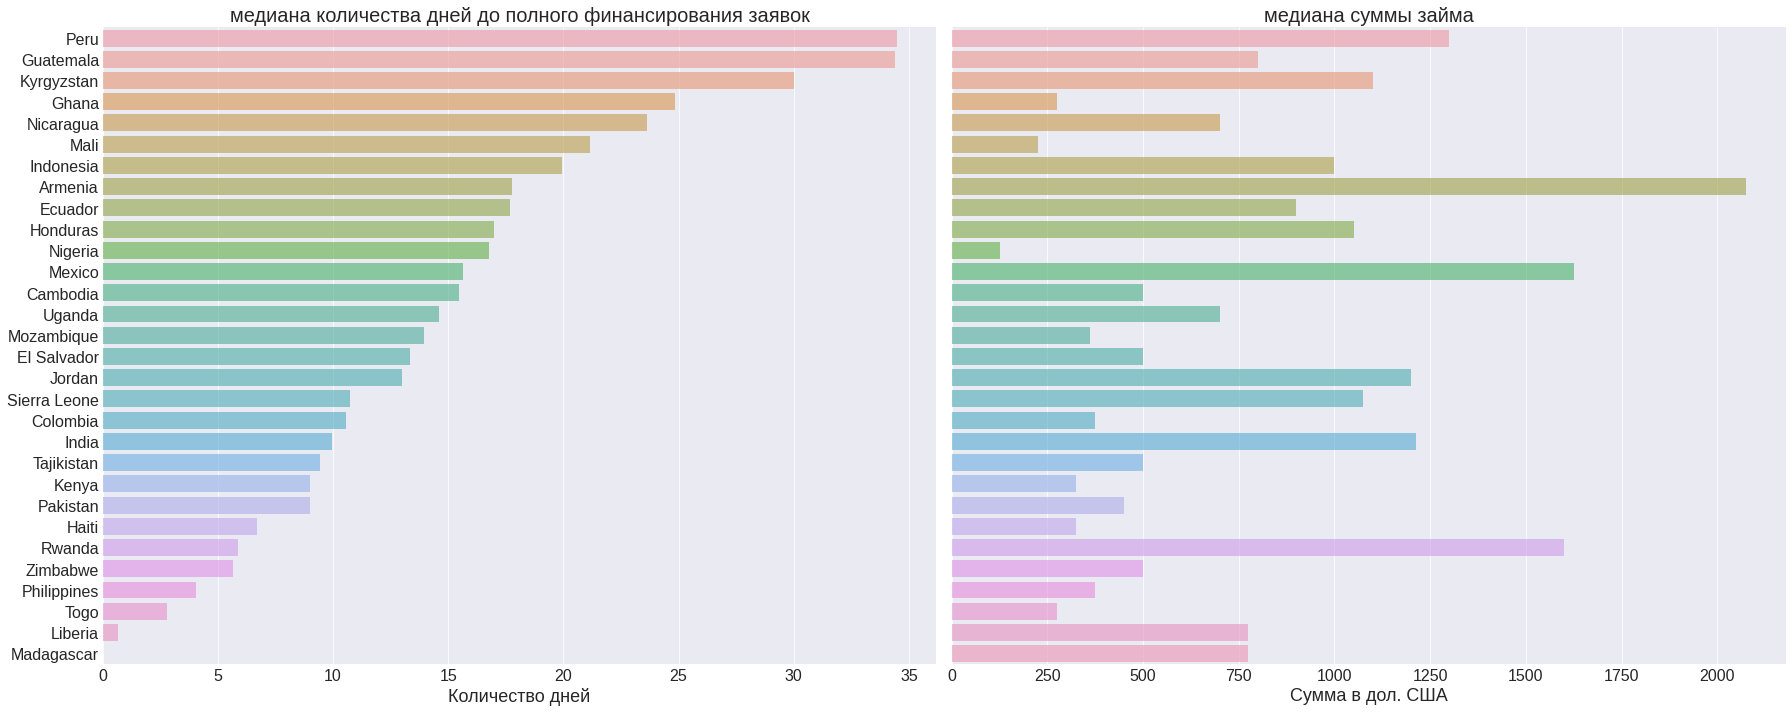

In [68]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(25, 10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=axs[0])
axs[0].set_title("медиана количества дней до полного финансирования заявок", fontsize=20)
axs[0].set_xlabel('Количество дней', fontsize=18)
axs[0].set_ylabel(None)
axs[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=axs[1])
axs[1].set_title("медиана суммы займа", fontsize=20)
axs[1].set_xlabel('Сумма в дол. США', fontsize=18)
axs[1].set_ylabel(None)
axs[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Прямой связи времени ожидания финансирования и суммой займа не наблюдается

В ряде стран с довольно большой медианной суммы займа наблюдаются короткие интервалы на сбор средств:
- Либерия: **750** USD - **1** день
- Руанда: **1600** USD - **5** дней
- Индия: **1250** USD - **10** дней 

И наоборот, в нескольких странах на сбор относительно небольшой суммы требуется дополнительные промежутки времени
- Нигерия **125** USD - **17** дней
- Мали: **250** USD - **22** дня
- Гана: **250** USD - **25** дня

## Сумма кредита и время погашения
***
Рассмотри информацию о количестве месяцев, необходимых заемщикам для погашения своих кредитов.

Простое построение среднего/медианного времени погашения по странам может дать некоторую информацию, однако она может ввести в заблуждение.

Действительно, скажем, в стране А кредиты погашаются в среднем через 12 месяцев, а в стране В - через 15 месяцев. Если на этом остановится, то можно было бы просто сказать, что людям в тране В в среднем нужно больше времени, чтобы погасить свои кредиты, по сравнению с людьми из стран А.

Теперь давайте предположим, что средняя сумма кредитов в стране А составляет 500 долларов, тогда как в стране В это 800 долларов, тогда это означает, что люди в стане А платят 41,66 в месяц, в то время как люди в стране В платят 51,33 в месяц!

Поэтому, что более важно - это соотношение суммы кредита и времени погашения. Это соотношение дает представление о том, сколько денег в месяц человек в данной стране может себе тратить на погашение кредита.

Теперь рассчитаем сумму ежемесячного платежа для каждой страны:

In [69]:
df_country_median = df_country_median.sort_values(by='term_in_months')

In [70]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

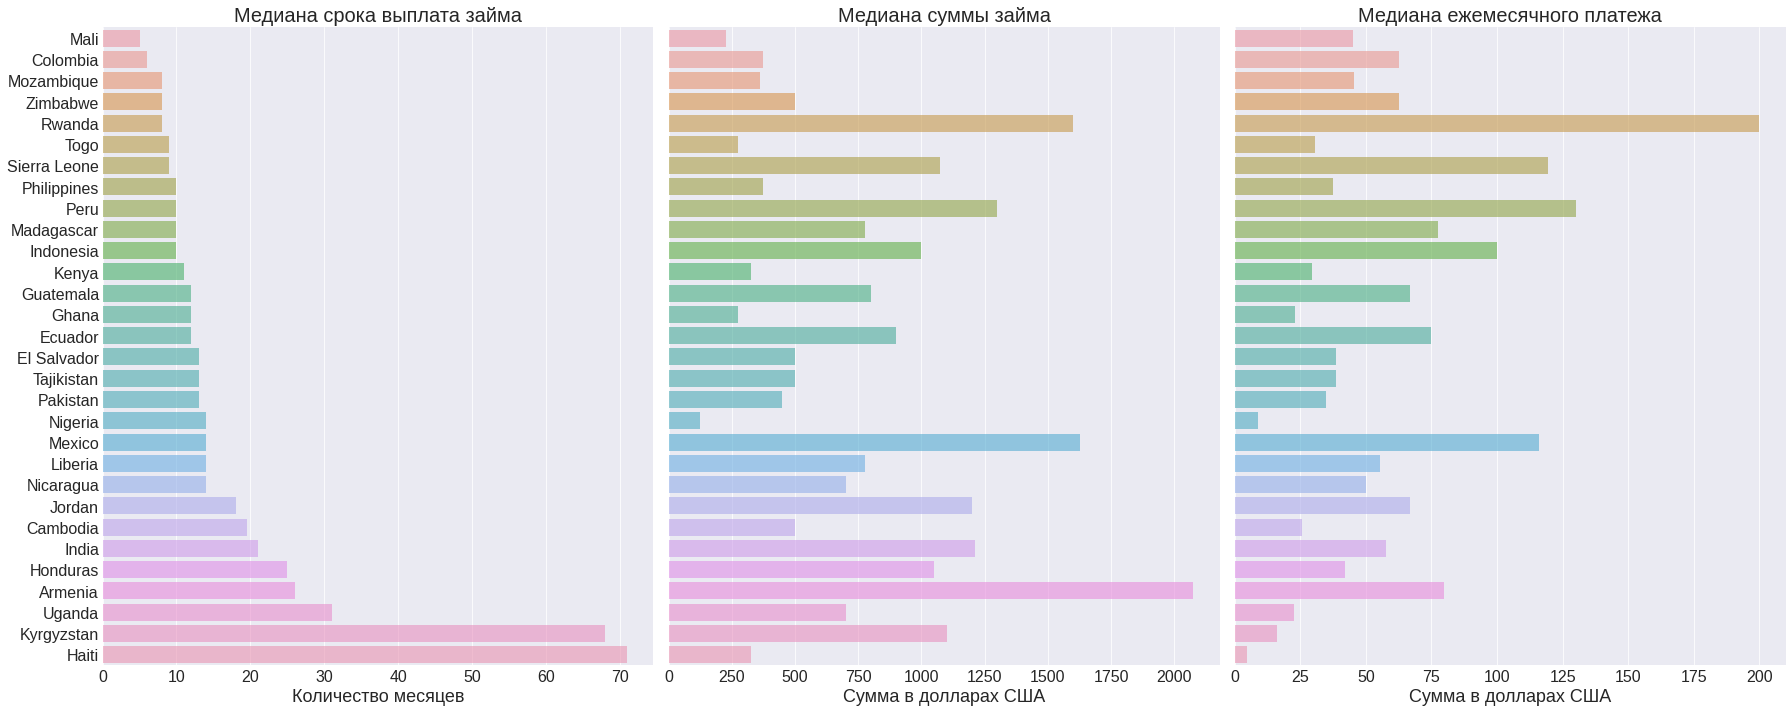

In [71]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=axs[0])
axs[0].set_title('Медиана срока выплата займа', fontsize=20)
axs[0].set_xlabel('Количество месяцев', fontsize=18)
axs[0].set_ylabel(None)
axs[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=axs[1])
axs[1].set_title('Медиана суммы займа', fontsize=20)
axs[1].set_xlabel('Сумма в долларах США', fontsize=18)
axs[1].set_ylabel(None)
axs[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=axs[2])
axs[2].set_title('Медиана ежемесячного платежа', fontsize=20)
axs[2].set_xlabel('Сумма в долларах США', fontsize=18)
axs[2].set_ylabel(None)
axs[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()